<a href="https://colab.research.google.com/github/ydeng-MLM/PANi_Elli_Fit/blob/main/PANi_ellipsometry_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [1]:
!pip install pyElli[fitting]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 13.6 MB/s eta 0:00:00


In [2]:
import elli
from elli.fitting import ParamsHist, fit

In [3]:
pip install cmasher

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.5/531.5 kB 4.7 MB/s eta 0:00:00


In [4]:
import cmasher as cm

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

In [7]:
!pip install SciencePlots

In [8]:
import scienceplots
plt.style.use(['science', 'nature', 'notebook'])

In [9]:
rii_db = elli.db.RII()

In [10]:
Au = rii_db.get_mat("Au", "Ordal")

#Loading FTIR Measurement

In [12]:
data0 = pd.read_csv('/content/harrick_PANi_original.dpt', delimiter='\t', header=None).to_numpy()
datan01 = pd.read_csv('/content/harrick_PANi_negadot1.dpt', delimiter='\t', header=None).to_numpy()
datan02 = pd.read_csv('/content/harrick_PANi_negadot2.dpt', delimiter='\t', header=None).to_numpy()
datan03 = pd.read_csv('/content/harrik_sample_sisub_neg0d3_23degree.dpt', delimiter='\t', header=None).to_numpy()
dataref = pd.read_csv('/content/harrik_Au_flat_sisub.dpt', delimiter='\t', header=None).to_numpy()

In [13]:
FTIR_arr = np.zeros((len(data0),14))
FTIR_arr[:,9] = data0[:,1]
FTIR_arr[:,10] = datan01[:,1]
FTIR_arr[:,11] = datan02[:,1]
FTIR_arr[:,12] = datan03[:,1]
FTIR_arr[:,13] = dataref[:,1]

for i in range(9):
  FTIR_arr[:,i]= pd.read_csv('/content/harrick_PANi_0'+str(i)+'.dpt', delimiter='\t', header=None).to_numpy()[:,1]

In [14]:
wl = 1e4/data0[:,0]

R_arr = np.zeros(FTIR_arr.shape)
R_arr[:,0] = wl

s = elli.Structure(elli.AIR, [elli.Layer(elli.AIR, 0)], Au)
R_Au = elli.ResultList([s.evaluate(wl*1e3, 23)]).R
Au_ref = FTIR_arr[:,13]/R_Au

for i in range(13):
  R_arr[:,i+1] = FTIR_arr[:,i]/Au_ref

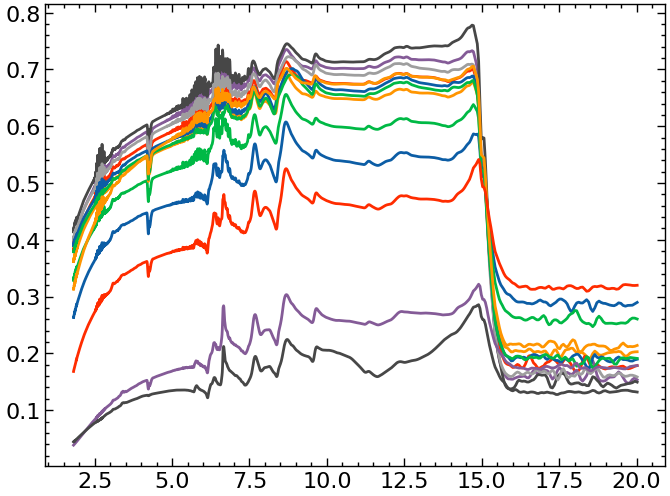

In [15]:
plt.plot(wl, R_arr[:,1:])

In [16]:
header = "Wavelength (um), 0.0V,0.1V,0.2V,0.3V,0.4V,0.5V,0.6V,0.7V,0.8V, Pristine, -0.1V,-0.2V,-0.3V"
np.savetxt('R_corrected.csv', R_arr, delimiter=',', header=header)

In [17]:
data0 = pd.read_csv('/content/harrick_PANi_original.dpt', delimiter='\t', header=None).to_numpy()
data05 = pd.read_csv('/content/harrick_PANi_05.dpt', delimiter='\t', header=None).to_numpy()
datan03 = pd.read_csv('/content/harrik_sample_sisub_neg0d3_23degree.dpt', delimiter='\t', header=None).to_numpy()
dataref = pd.read_csv('/content/harrik_Au_flat_sisub.dpt', delimiter='\t', header=None).to_numpy()

In [18]:
data0 = pd.read_csv('/content/harrick_PANi_original.dpt', delimiter='\t', header=None).to_numpy()
data05 = pd.read_csv('/content/harrick_PANi_05.dpt', delimiter='\t', header=None).to_numpy()
datan03 = pd.read_csv('/content/harrik_sample_sisub_neg0d3_23degree.dpt', delimiter='\t', header=None).to_numpy()
dataref = pd.read_csv('/content/harrik_Au_flat_sisub.dpt', delimiter='\t', header=None).to_numpy()

In [19]:
wl = 1e4/data0[:2500,0]

s = elli.Structure(elli.AIR, [elli.Layer(elli.AIR, 0)], Au)
R_Au = elli.ResultList([s.evaluate(wl*1e3, 23)]).R

E0 = 1-data0[:2500,1]/dataref[:2500,1]*R_Au
E05 = 1-data05[:2500,1]/dataref[:2500,1]*R_Au
En03 = 1-datan03[:2500,1]/dataref[:2500,1]*R_Au

In [20]:
np.savetxt('R_Au_Ordal.csv', R_Au)

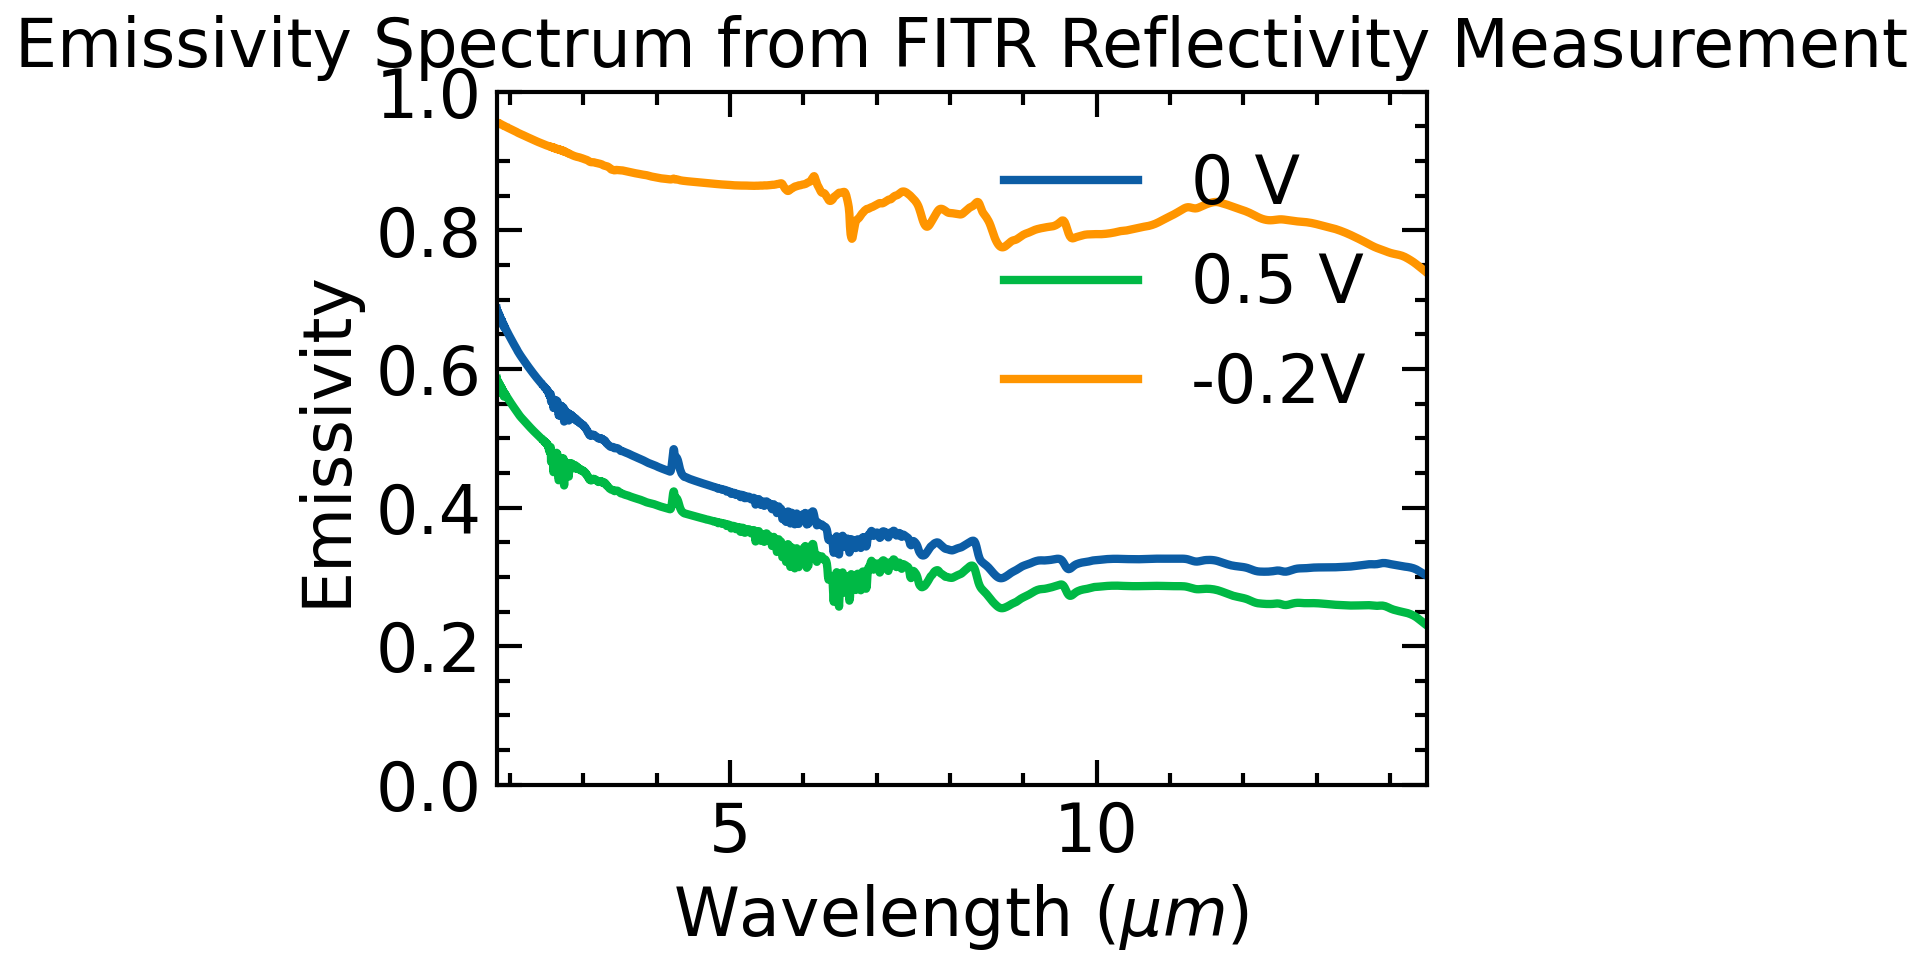

In [21]:
plt.figure(figsize=(4,3), dpi=300)
plt.plot(wl, E0, label='0 V')
plt.plot(wl, E05, label='0.5 V')
plt.plot(wl, En03, label='-0.2V')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Emissivity')
plt.title('Emissivity Spectrum from FITR Reflectivity Measurement')
plt.xlim([np.min(wl), 14.5])
plt.ylim([0, 1])
plt.legend()

# Insulating & Conducting Fitting

## Pristine

In [155]:
ANGLE=55

df = pd.read_csv('/content/pristine.dat', delimiter='\t', skiprows=3, header=None, encoding='cp1252')

df = df[(df[2]==ANGLE) & (df[0]=="E ")][[1,3,4]]

In [156]:
# Convert the DataFrame to a NumPy array
array = df.values.astype(np.float32)

print(array.shape)

array[:,0] = 1e7/array[:,0]

lbda = np.copy(array[:,0])

(506, 3)


In [157]:
psi_delta = pd.DataFrame(array, columns=["Wavelength", "Ψ", "Δ"])

psi_delta.set_index('Wavelength', drop=True, inplace=True)

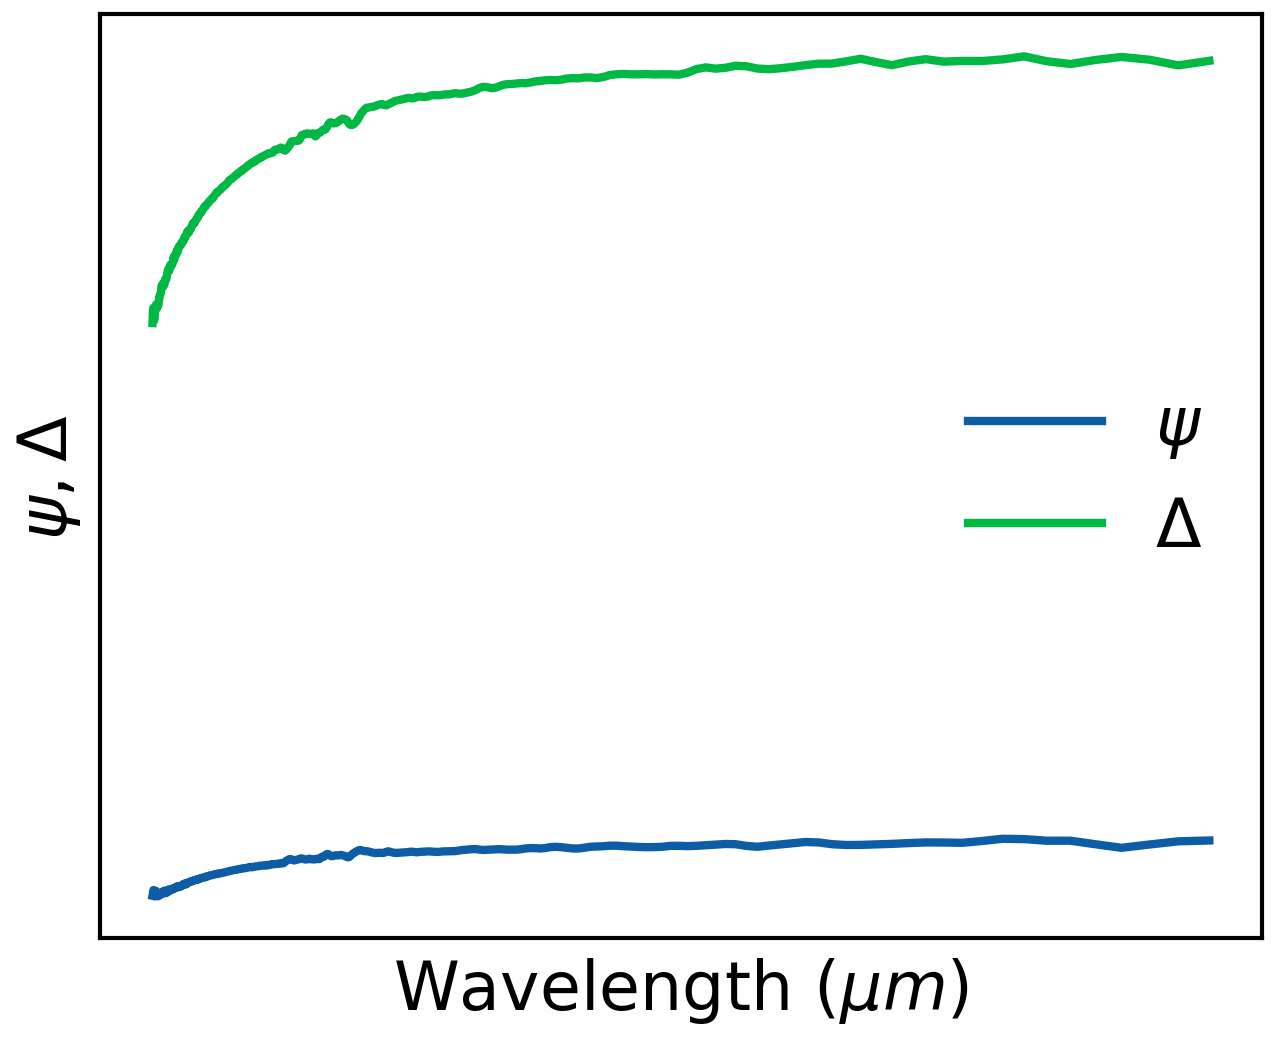

In [158]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
plt.plot(array[:,0]/1000, array[:,1], label='$\psi$')
plt.plot(array[:,0]/1000, array[:,2], label='$\Delta$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('$\psi, \Delta$')
#plt.title('Ellipsometry measurement for original sample with incident angle = %i degree'%ANGLE)
#plt.xlim([np.min(wl), 14.5])
# Remove all x and y ticks
plt.xticks([])
plt.yticks([])

plt.legend()

In [159]:
fig.savefig("ellip_measurement.svg", transparent=True)

In [160]:
psi_delta

,Ψ,Δ
Wavelength,,
1807.847534,30.245701,127.225998
1817.990112,30.494400,128.730194
1828.247070,30.951099,129.764099
1838.620605,31.222700,129.604004
1849.112427,31.038601,128.488495
...,...,...
33236.945312,38.977001,171.757507
34111.066406,38.373501,172.274094
35033.632812,38.928501,171.812698


In [161]:
from google.colab import output
output.enable_custom_widget_manager()

In [162]:
params = ParamsHist()
params.add("pani_A1", value=102, min=100, max=110, vary=True)
params.add("pani_lambda_r1", value=328, min=320, max=330, vary=True)
params.add("pani_G1", value=6.5e4, min=6.45e4, max=6.55e4, vary=True)

params.add("pani_A2", value=125, min=120, max=130, vary=True)
params.add("pani_lambda_r2", value=1.9e4, min=1.85e4, max=1.95e4, vary=True)
params.add("pani_G2", value=5.6e4, min=5.5e4, max=5.7e4, vary=True)

params.add("pani_A3", value=6, min=5, max=7, vary=True)
params.add("pani_lambda_r3", value=690, min=680, max=700, vary=True)
params.add("pani_G3", value=3.4e5, min=3.35e5, max=3.45e5, vary=True)

params.add("pani_A4", value=92, min=90, max=95, vary=True)
params.add("pani_lambda_r4", value=1.35e4, min=1.3e4, max=1.4e4, vary=True)
params.add("pani_G4", value=8.6e4, min=8.5e4, max=8.7e4, vary=True)

params.add("pani_d", value=6000, min=6000, max=6500, vary=False)

In [163]:
@fit(psi_delta, params, ANGLE)
def model(lbda, params):
    # Generate the cauchy model from the current lmfit parameters

    pani = elli.LorentzLambda().add(
        params["pani_A1"],
        params["pani_lambda_r1"],
        params["pani_G1"],
    ).add(
        params["pani_A2"],
        params["pani_lambda_r2"],
        params["pani_G2"],
    ).add(
        params["pani_A3"],
        params["pani_lambda_r3"],
        params["pani_G3"],
    ).add(
        params["pani_A4"],
        params["pani_lambda_r4"],
        params["pani_G4"],
    ).get_mat()

    # get_mat() generates an IsotropicMaterial from the dispersion relation

    # Construct the layers you expect in your sample
    # Here, it only consists of one layer pani in between air and Si.
    # We build the structure coming from air, through the layers,
    # represented as an array, and having Si as bulk material.
    structure = elli.Structure(
        elli.AIR,  # Input medium
        [elli.Layer(pani, params["pani_d"])],  # Overlayer structure
        Au,
    )  # Output medium / Substrate

    # The model should return the evaluation of the structure at the experimental wavelengths lbda,
    # the experimental angle ANGLE and it should define a solver to calculate the transfer matrix.
    return structure.evaluate(lbda, ANGLE, solver=elli.Solver2x2)

In [164]:
fit_stats = model.fit()

In [165]:
fit_stats

In [166]:
fit_stats.params["pani_A1"]

<Parameter 'pani_A1', value=105.08062689645168 +/- 2.3e+04, bounds=[100:110]>

In [167]:
fitted_model = elli.LorentzLambda().add(
        fit_stats.params["pani_A1"],
        fit_stats.params["pani_lambda_r1"],
        fit_stats.params["pani_G1"],
    ).add(
        fit_stats.params["pani_A2"],
        fit_stats.params["pani_lambda_r2"],
        fit_stats.params["pani_G2"],
    ).add(
        fit_stats.params["pani_A3"],
        fit_stats.params["pani_lambda_r3"],
        fit_stats.params["pani_G3"],
    ).add(
        fit_stats.params["pani_A4"],
        fit_stats.params["pani_lambda_r4"],
        fit_stats.params["pani_G4"],
    )

In [168]:
fitted_modelo = fitted_model

## -0.3

In [176]:
ANGLE=55

df = pd.read_csv('/content/minusdot3-55.dat', delimiter='\t', skiprows=3, header=None, encoding='cp1252')

df = df[(df[2]==ANGLE) & (df[0]=="E ")][[1,3,4]]

In [177]:
# Convert the DataFrame to a NumPy array
array = df.values.astype(np.float32)

print(array.shape)

array[:,0] = 1e7/array[:,0]

lbda = np.copy(array[:,0])

(469, 3)


In [178]:
psi_delta = pd.DataFrame(array, columns=["Wavelength", "Ψ", "Δ"])

psi_delta.set_index('Wavelength', drop=True, inplace=True)

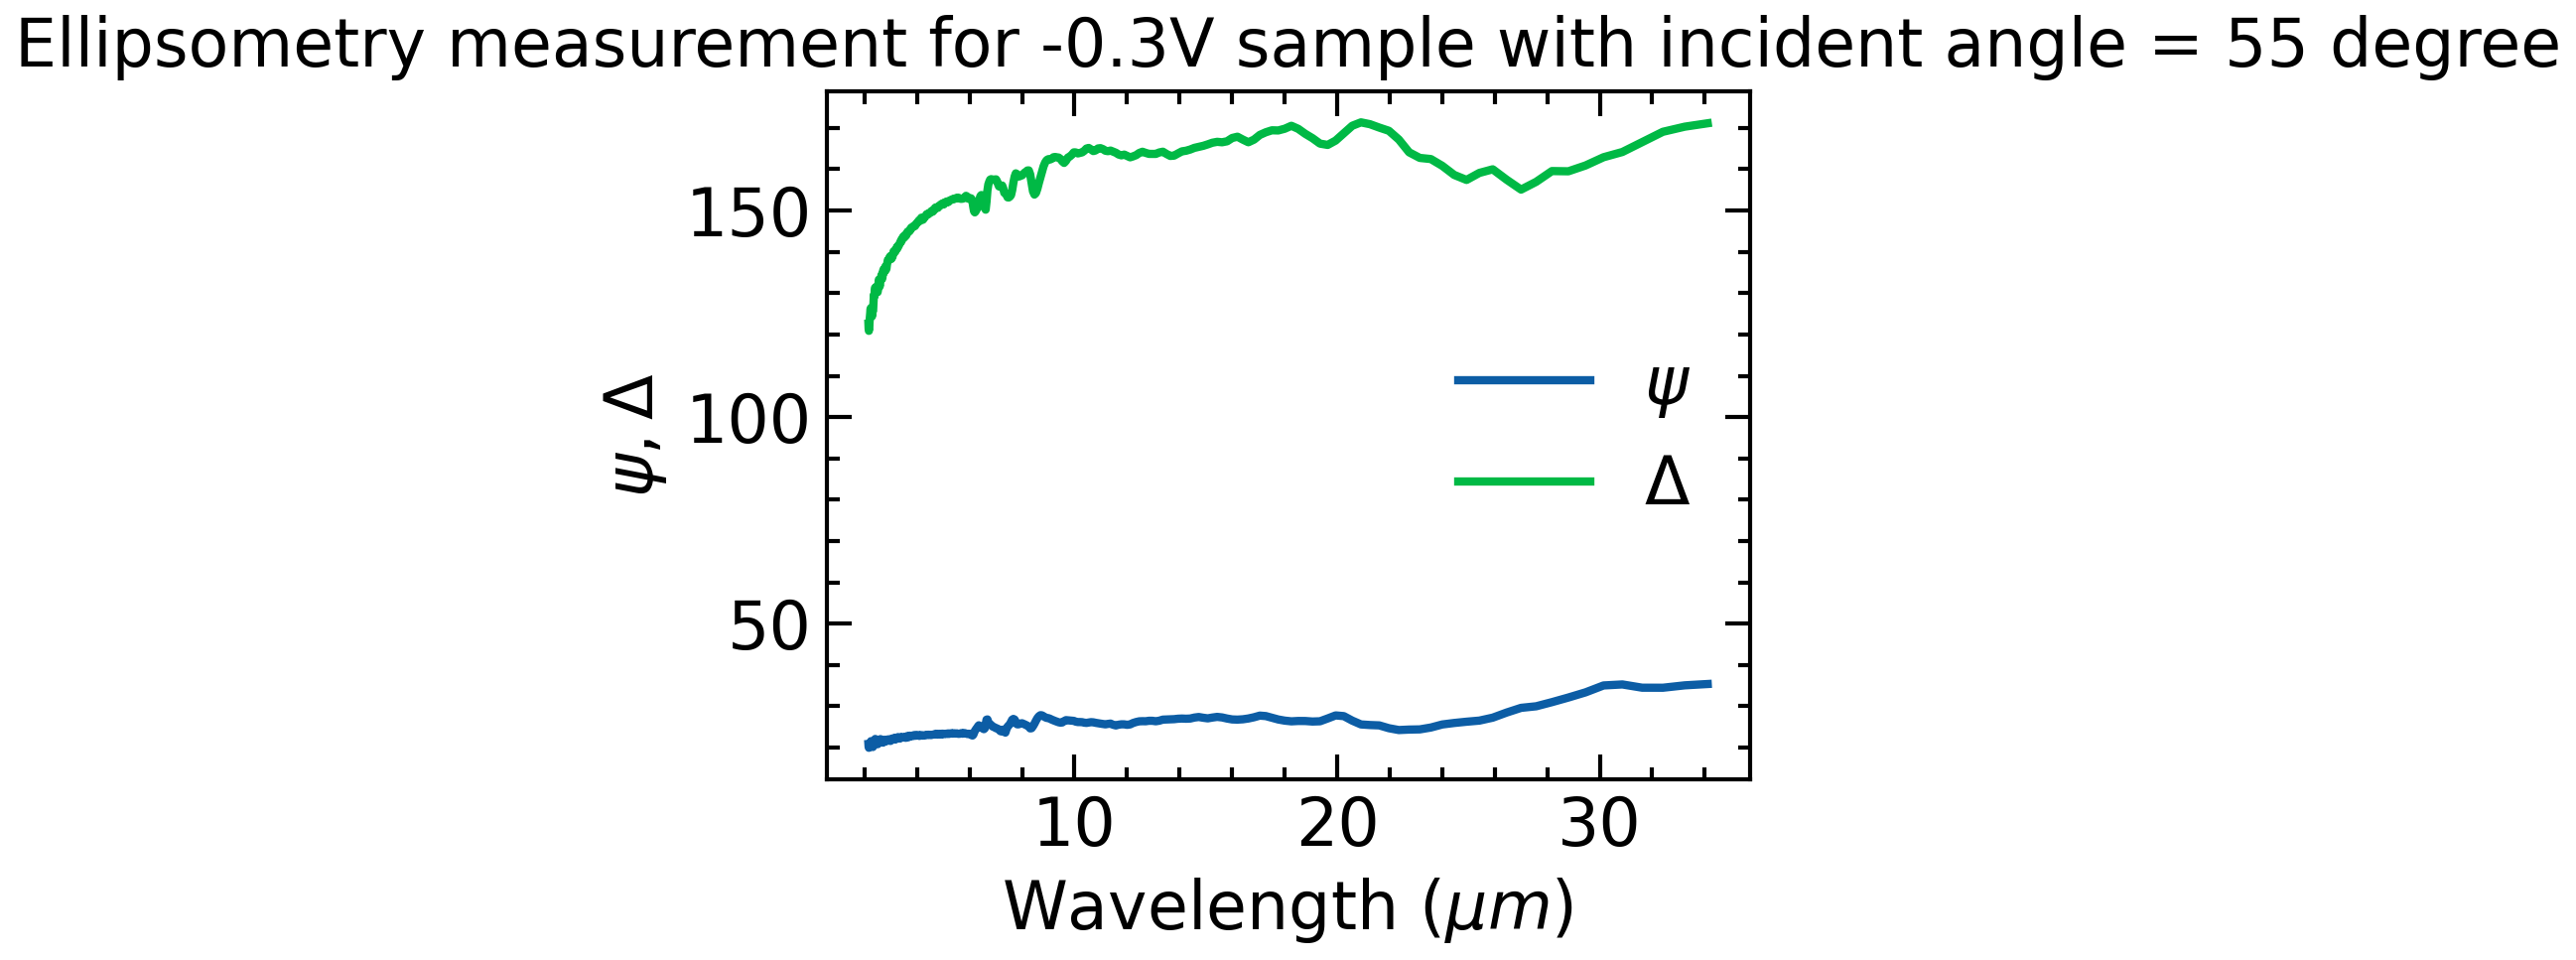

In [179]:
plt.figure(figsize=(4,3), dpi=300)
plt.plot(array[:,0]/1000, array[:,1], label='$\psi$')
plt.plot(array[:,0]/1000, array[:,2], label='$\Delta$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('$\psi, \Delta$')
plt.title('Ellipsometry measurement for -0.3V sample with incident angle = %i degree'%ANGLE)
#plt.xlim([np.min(wl), 14.5])
plt.legend()

In [180]:
from google.colab import output
output.enable_custom_widget_manager()

In [182]:
params = ParamsHist()
params.add("pani_A1", value=6.5, min=6, max=7, vary=True)
params.add("pani_lambda_r1", value=450, min=440, max=460, vary=True)
params.add("pani_G1", value=7250, min=7200, max=7300, vary=True)

params.add("pani_A2", value=11, min=10, max=12, vary=True)
params.add("pani_lambda_r2", value=1.4e5, min=1.3e5, max=1.5e5, vary=True)
params.add("pani_G2", value=8.5e5, min=8e5, max=9e5, vary=True)

params.add("pani_A3", value=23, min=20, max=25, vary=True)
params.add("pani_lambda_r3", value=735, min=730, max=740, vary=True)
params.add("pani_G3", value=2.2e5, min=2e5, max=2.5e5, vary=True)

params.add("pani_A4", value=102, min=100, max=105, vary=True)
params.add("pani_lambda_r4", value=1500, min=1450, max=1550, vary=True)
params.add("pani_G4", value=1.4e6, min=1.3e6, max=1.5e6, vary=True)

params.add("pani_d", value=6000, min=6000, max=6500, vary=False)

In [183]:
@fit(psi_delta, params, ANGLE)
def model(lbda, params):
    # Generate the cauchy model from the current lmfit parameters

    pani = elli.LorentzLambda().add(
        params["pani_A1"],
        params["pani_lambda_r1"],
        params["pani_G1"],
    ).add(
        params["pani_A2"],
        params["pani_lambda_r2"],
        params["pani_G2"],
    ).add(
        params["pani_A3"],
        params["pani_lambda_r3"],
        params["pani_G3"],
    ).add(
        params["pani_A4"],
        params["pani_lambda_r4"],
        params["pani_G4"],
    ).get_mat()

    # get_mat() generates an IsotropicMaterial from the dispersion relation

    # Construct the layers you expect in your sample
    # Here, it only consists of one layer pani in between air and Si.
    # We build the structure coming from air, through the layers,
    # represented as an array, and having Si as bulk material.
    structure = elli.Structure(
        elli.AIR,  # Input medium
        [elli.Layer(pani, params["pani_d"])],  # Overlayer structure
        Au,
    )  # Output medium / Substrate

    # The model should return the evaluation of the structure at the experimental wavelengths lbda,
    # the experimental angle ANGLE and it should define a solver to calculate the transfer matrix.
    return structure.evaluate(lbda, ANGLE, solver=elli.Solver2x2)

In [184]:
fit_stats = model.fit()

In [185]:
fit_stats

In [186]:
fitted_model = elli.LorentzLambda().add(
        fit_stats.params["pani_A1"],
        fit_stats.params["pani_lambda_r1"],
        fit_stats.params["pani_G1"],
    ).add(
        fit_stats.params["pani_A2"],
        fit_stats.params["pani_lambda_r2"],
        fit_stats.params["pani_G2"],
    ).add(
        fit_stats.params["pani_A3"],
        fit_stats.params["pani_lambda_r3"],
        fit_stats.params["pani_G3"],
    ).add(
        fit_stats.params["pani_A4"],
        fit_stats.params["pani_lambda_r4"],
        fit_stats.params["pani_G4"],
    )

In [187]:
fitted_model3 = fitted_model

## +0.5

In [223]:
ANGLE=55

df = pd.read_csv('/content/0d5.dat', delimiter='\t', skiprows=3, header=None, encoding='cp1252')

df = df[(df[2]==ANGLE) & (df[0]=="E ")][[1,3,4]]

In [224]:
# Convert the DataFrame to a NumPy array
array = df.values.astype(np.float32)

print(array.shape)

array[:,0] = 1e7/array[:,0]

lbda = np.copy(array[:,0])

(511, 3)


In [225]:
psi_delta = pd.DataFrame(array, columns=["Wavelength", "Ψ", "Δ"])

psi_delta.set_index('Wavelength', drop=True, inplace=True)

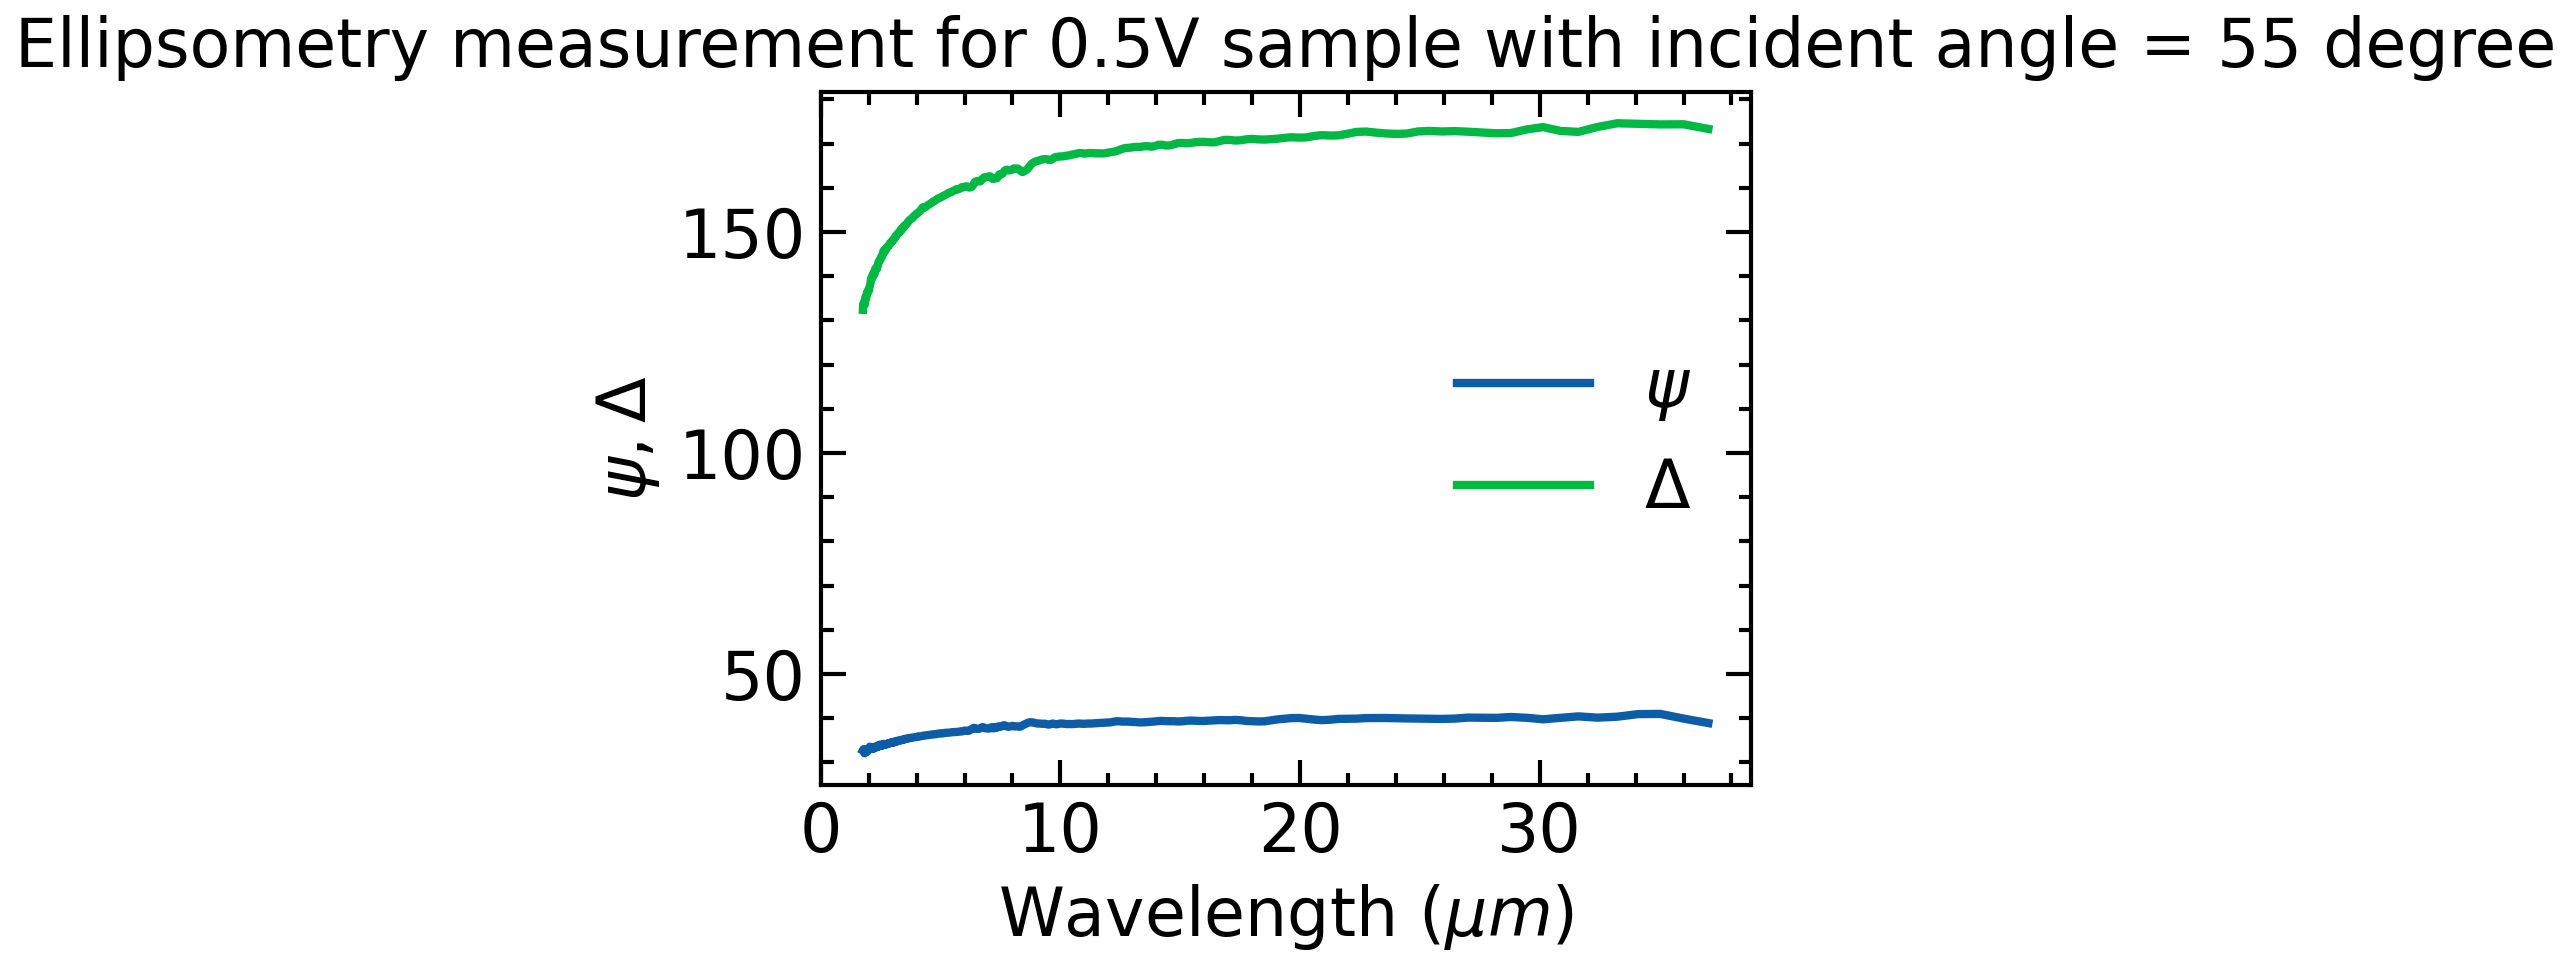

In [226]:
plt.figure(figsize=(4,3), dpi=300)
plt.plot(array[:,0]/1000, array[:,1], label='$\psi$')
plt.plot(array[:,0]/1000, array[:,2], label='$\Delta$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('$\psi, \Delta$')
plt.title('Ellipsometry measurement for 0.5V sample with incident angle = %i degree'%ANGLE)
#plt.xlim([np.min(wl), 14.5])
plt.legend()

In [227]:
from google.colab import output
output.enable_custom_widget_manager()

In [228]:
params = ParamsHist()
params.add("pani_A1", value=91, min=90, max=95, vary=True)
params.add("pani_lambda_r1", value=490, min=485, max=495, vary=True)
params.add("pani_G1", value=6e4, min=5.9e4, max=6.1e4, vary=True)

params.add("pani_A2", value=146, min=140, max=150, vary=True)
params.add("pani_lambda_r2", value=2.2e4, min=2.1e4, max=2.3e4, vary=True)
params.add("pani_G2", value=4.9e4, min=4.8e4, max=5e4, vary=True)

params.add("pani_A3", value=128, min=125, max=130, vary=True)
params.add("pani_lambda_r3", value=500, min=480, max=520, vary=True)
params.add("pani_G3", value=2.9e5, min=2.85e5, max=2.95e5, vary=True)

params.add("pani_A4", value=79, min=75, max=85, vary=True)
params.add("pani_lambda_r4", value=8.9e3, min=8.8e3, max=9e3, vary=True)
params.add("pani_G4", value=3.2e4, min=3.1e4, max=3.3e4, vary=True)

params.add("pani_d", value=6000, min=6000, max=6500, vary=False)

In [229]:
@fit(psi_delta, params, ANGLE)
def model(lbda, params):
    # Generate the cauchy model from the current lmfit parameters

    pani = elli.LorentzLambda().add(
        params["pani_A1"],
        params["pani_lambda_r1"],
        params["pani_G1"],
    ).add(
        params["pani_A2"],
        params["pani_lambda_r2"],
        params["pani_G2"],
    ).add(
        params["pani_A3"],
        params["pani_lambda_r3"],
        params["pani_G3"],
    ).add(
        params["pani_A4"],
        params["pani_lambda_r4"],
        params["pani_G4"],
    ).get_mat()

    # get_mat() generates an IsotropicMaterial from the dispersion relation

    # Construct the layers you expect in your sample
    # Here, it only consists of one layer pani in between air and Si.
    # We build the structure coming from air, through the layers,
    # represented as an array, and having Si as bulk material.
    structure = elli.Structure(
        elli.AIR,  # Input medium
        [elli.Layer(pani, params["pani_d"])],  # Overlayer structure
        Au,
    )  # Output medium / Substrate

    # The model should return the evaluation of the structure at the experimental wavelengths lbda,
    # the experimental angle ANGLE and it should define a solver to calculate the transfer matrix.
    return structure.evaluate(lbda, ANGLE, solver=elli.Solver2x2)

In [230]:
fit_stats = model.fit()

In [231]:
fit_stats

In [232]:
fitted_model = elli.LorentzLambda().add(
        fit_stats.params["pani_A1"],
        fit_stats.params["pani_lambda_r1"],
        fit_stats.params["pani_G1"],
    ).add(
        fit_stats.params["pani_A2"],
        fit_stats.params["pani_lambda_r2"],
        fit_stats.params["pani_G2"],
    ).add(
        fit_stats.params["pani_A3"],
        fit_stats.params["pani_lambda_r3"],
        fit_stats.params["pani_G3"],
    ).add(
        fit_stats.params["pani_A4"],
        fit_stats.params["pani_lambda_r4"],
        fit_stats.params["pani_G4"],
    )

In [233]:
fitted_model5 = fitted_model

In [234]:
fitted_model5

LorentzLambda


Oscillators
A = <Parameter 'pani_A1', value=92.5, bounds=[90:95]>, lambda_r = <Parameter 'pani_lambda_r1', value=486.48266126720097, bounds=[485:495]>, gamma = <Parameter 'pani_G1', value=59003.254898348234, bounds=[59000.0:61000.0]>
A = <Parameter 'pani_A2', value=140.0000000177614, bounds=[140:150]>, lambda_r = <Parameter 'pani_lambda_r2', value=22999.99955830526, bounds=[21000.0:23000.0]>, gamma = <Parameter 'pani_G2', value=49999.99999996922, bounds=[48000.0:50000.0]>
A = <Parameter 'pani_A3', value=125.0000285771017, bounds=[125:130]>, lambda_r = <Parameter 'pani_lambda_r3', value=480.4034198725196, bounds=[480:520]>, gamma = <Parameter 'pani_G3', value=294999.857106162, bounds=[285000.0:295000.0]>
A = <Parameter 'pani_A4', value=75.04456309636916, bounds=[75:85]>, lambda_r = <Parameter 'pani_lambda_r4', value=8800.001945486398, bounds=[8800.0:9000.0]>, gamma = <Parameter 'pani_G4', value=32999.966810189966, bounds=[31000.0:33000.0]>

#Transfer matrix check

In [235]:
def get_Rs(fitted_model, wavelength, thickness, angle):
  s = elli.Structure(elli.AIR, [elli.Layer(fitted_model.get_mat(), thickness)], elli.AIR)
  data = elli.ResultList([s.evaluate(wavelength, angle)])

  R_ss = data.R_ss
  R_pp = data.R_pp
  R = data.R
  T = data.T

  return R_ss, R_pp, R, T

In [236]:
lbda_sample = wl*1000
thickness = 6000
angle = 23

In [237]:
R_sso, R_ppo, Ro, To = get_Rs(fitted_modelo, lbda_sample, thickness, angle)
R_ss3, R_pp3, R3, T3 = get_Rs(fitted_model3, lbda_sample, thickness, angle)
R_ss5, R_pp5, R5, T5 = get_Rs(fitted_model5, lbda_sample, thickness, angle)

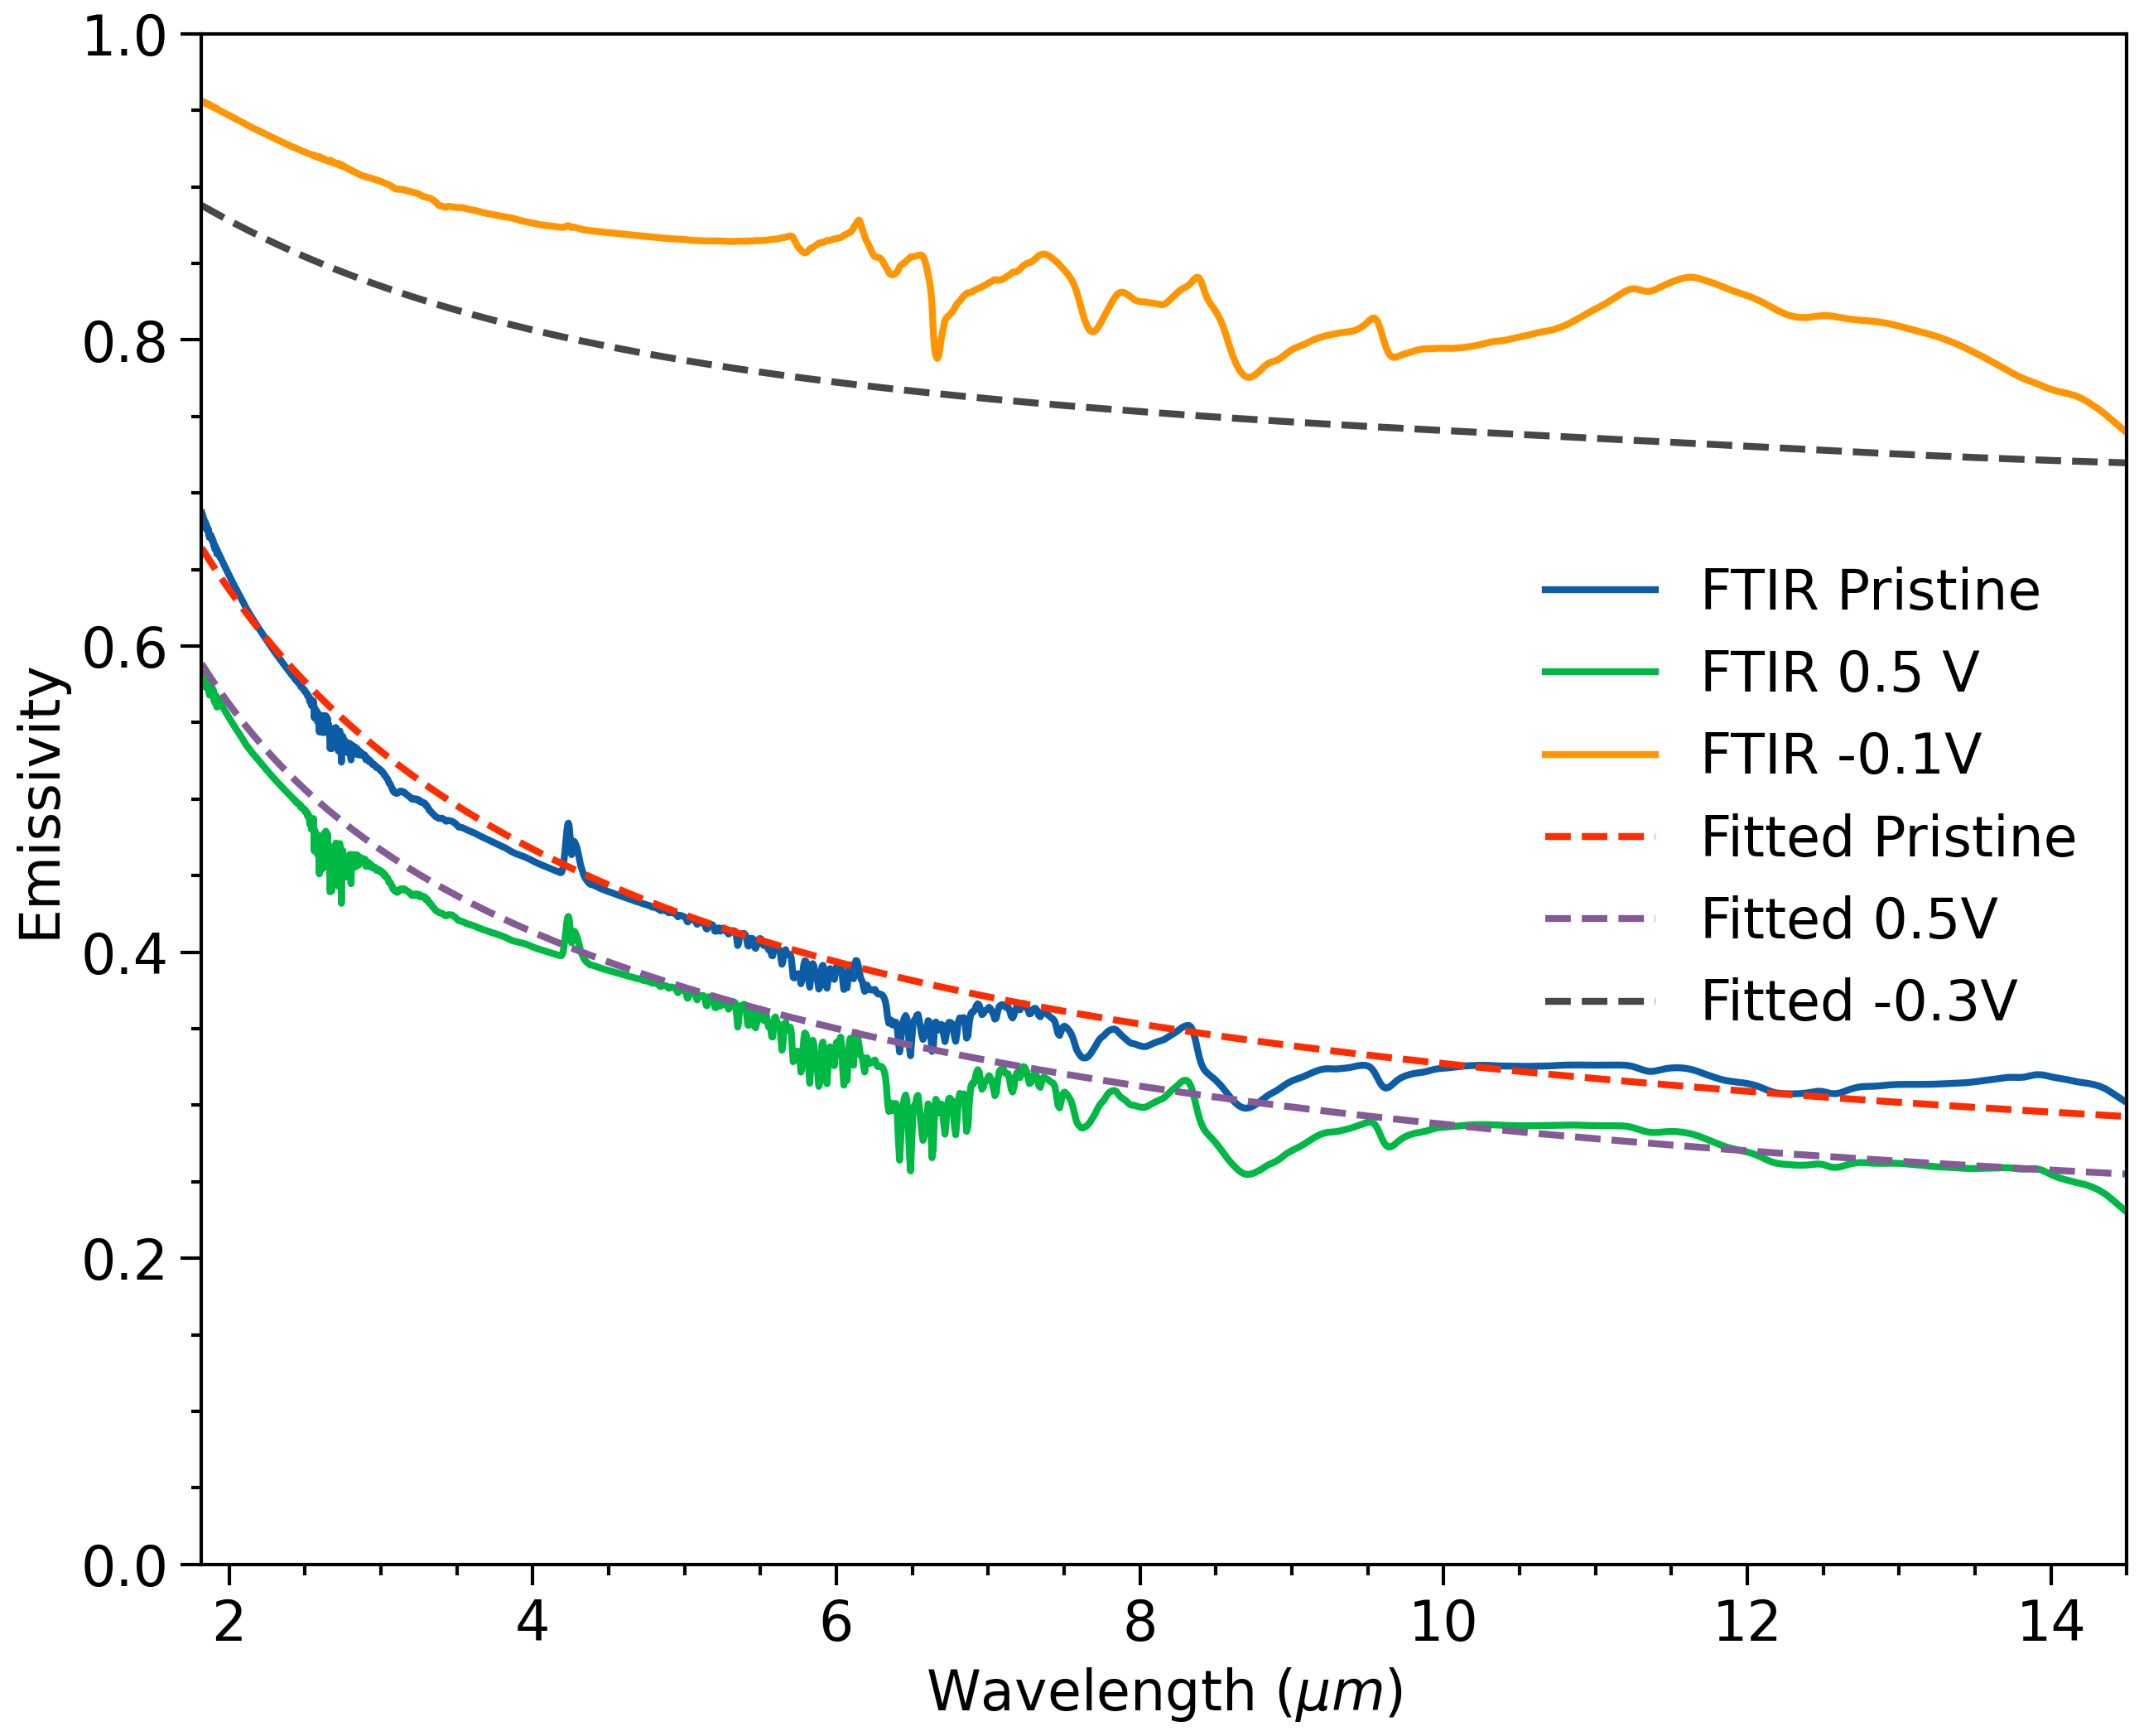

In [238]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
plt.plot(wl, E0, label='FTIR Pristine')
plt.plot(wl, E05, label='FTIR 0.5 V')
plt.plot(wl, En03, label='FTIR -0.1V')
plt.plot(lbda_sample/1000, 1-Ro, '--', label='Fitted Pristine')
plt.plot(lbda_sample/1000, 1-R5-T5, '--', label='Fitted 0.5V')
plt.plot(lbda_sample/1000, 1-R3-T3, '--', label='Fitted -0.3V')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Emissivity')
plt.xlim([np.min(wl), 14.5])
plt.ylim([0, 1])
plt.legend()

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [239]:
fig.savefig("FTIR_elli.svg", transparent=True)

In [240]:
import pandas as pd

# First, we'll create a DataFrame to hold our data
df = pd.DataFrame()

# Fill the DataFrame with data
df['wl'] = wl
df['FTIR Pristine'] = E0
df['FTIR 0.5 V'] = E05
df['FTIR -0.1V'] = En03

# Ensure that `lbda_sample` has the same length as `1-R5`, `1-R3`, and `1-Ro`
if len(lbda_sample) == len(R5):
    df2 = pd.DataFrame({
        'wl': lbda_sample/1000,
        'Fitted 0.5V': 1-R5,
        'Fitted -0.3V': 1-R3,
        'Fitted Pristine': 1-Ro
    })

    # Merge the two DataFrames on the 'wl' column
    df = pd.merge(df, df2, on='wl', how='outer')

# Sort values based on the 'wl' column to ensure they're in increasing order
df = df.sort_values(by='wl')

# Save the DataFrame to a CSV file
df.to_csv('fig2_a.csv', index=False)


# Degree vs. R

In [ ]:
lbda_sample = np.linspace(2000, 14500, 180)
angle_arr = np.linspace(-80, 80, len(lbda_sample))
R5 = np.zeros((len(lbda_sample), len(angle_arr)))
T5 = np.zeros((len(lbda_sample), len(angle_arr)))

In [ ]:
for i, angle in enumerate(angle_arr):
  s = elli.Structure(elli.AIR, [elli.Layer(fitted_model5.get_mat(), 6000)], elli.AIR)
  data = elli.ResultList([s.evaluate(lbda_sample, angle)])
  R5[i,:] = data.R
  T5[i,:] = data.T

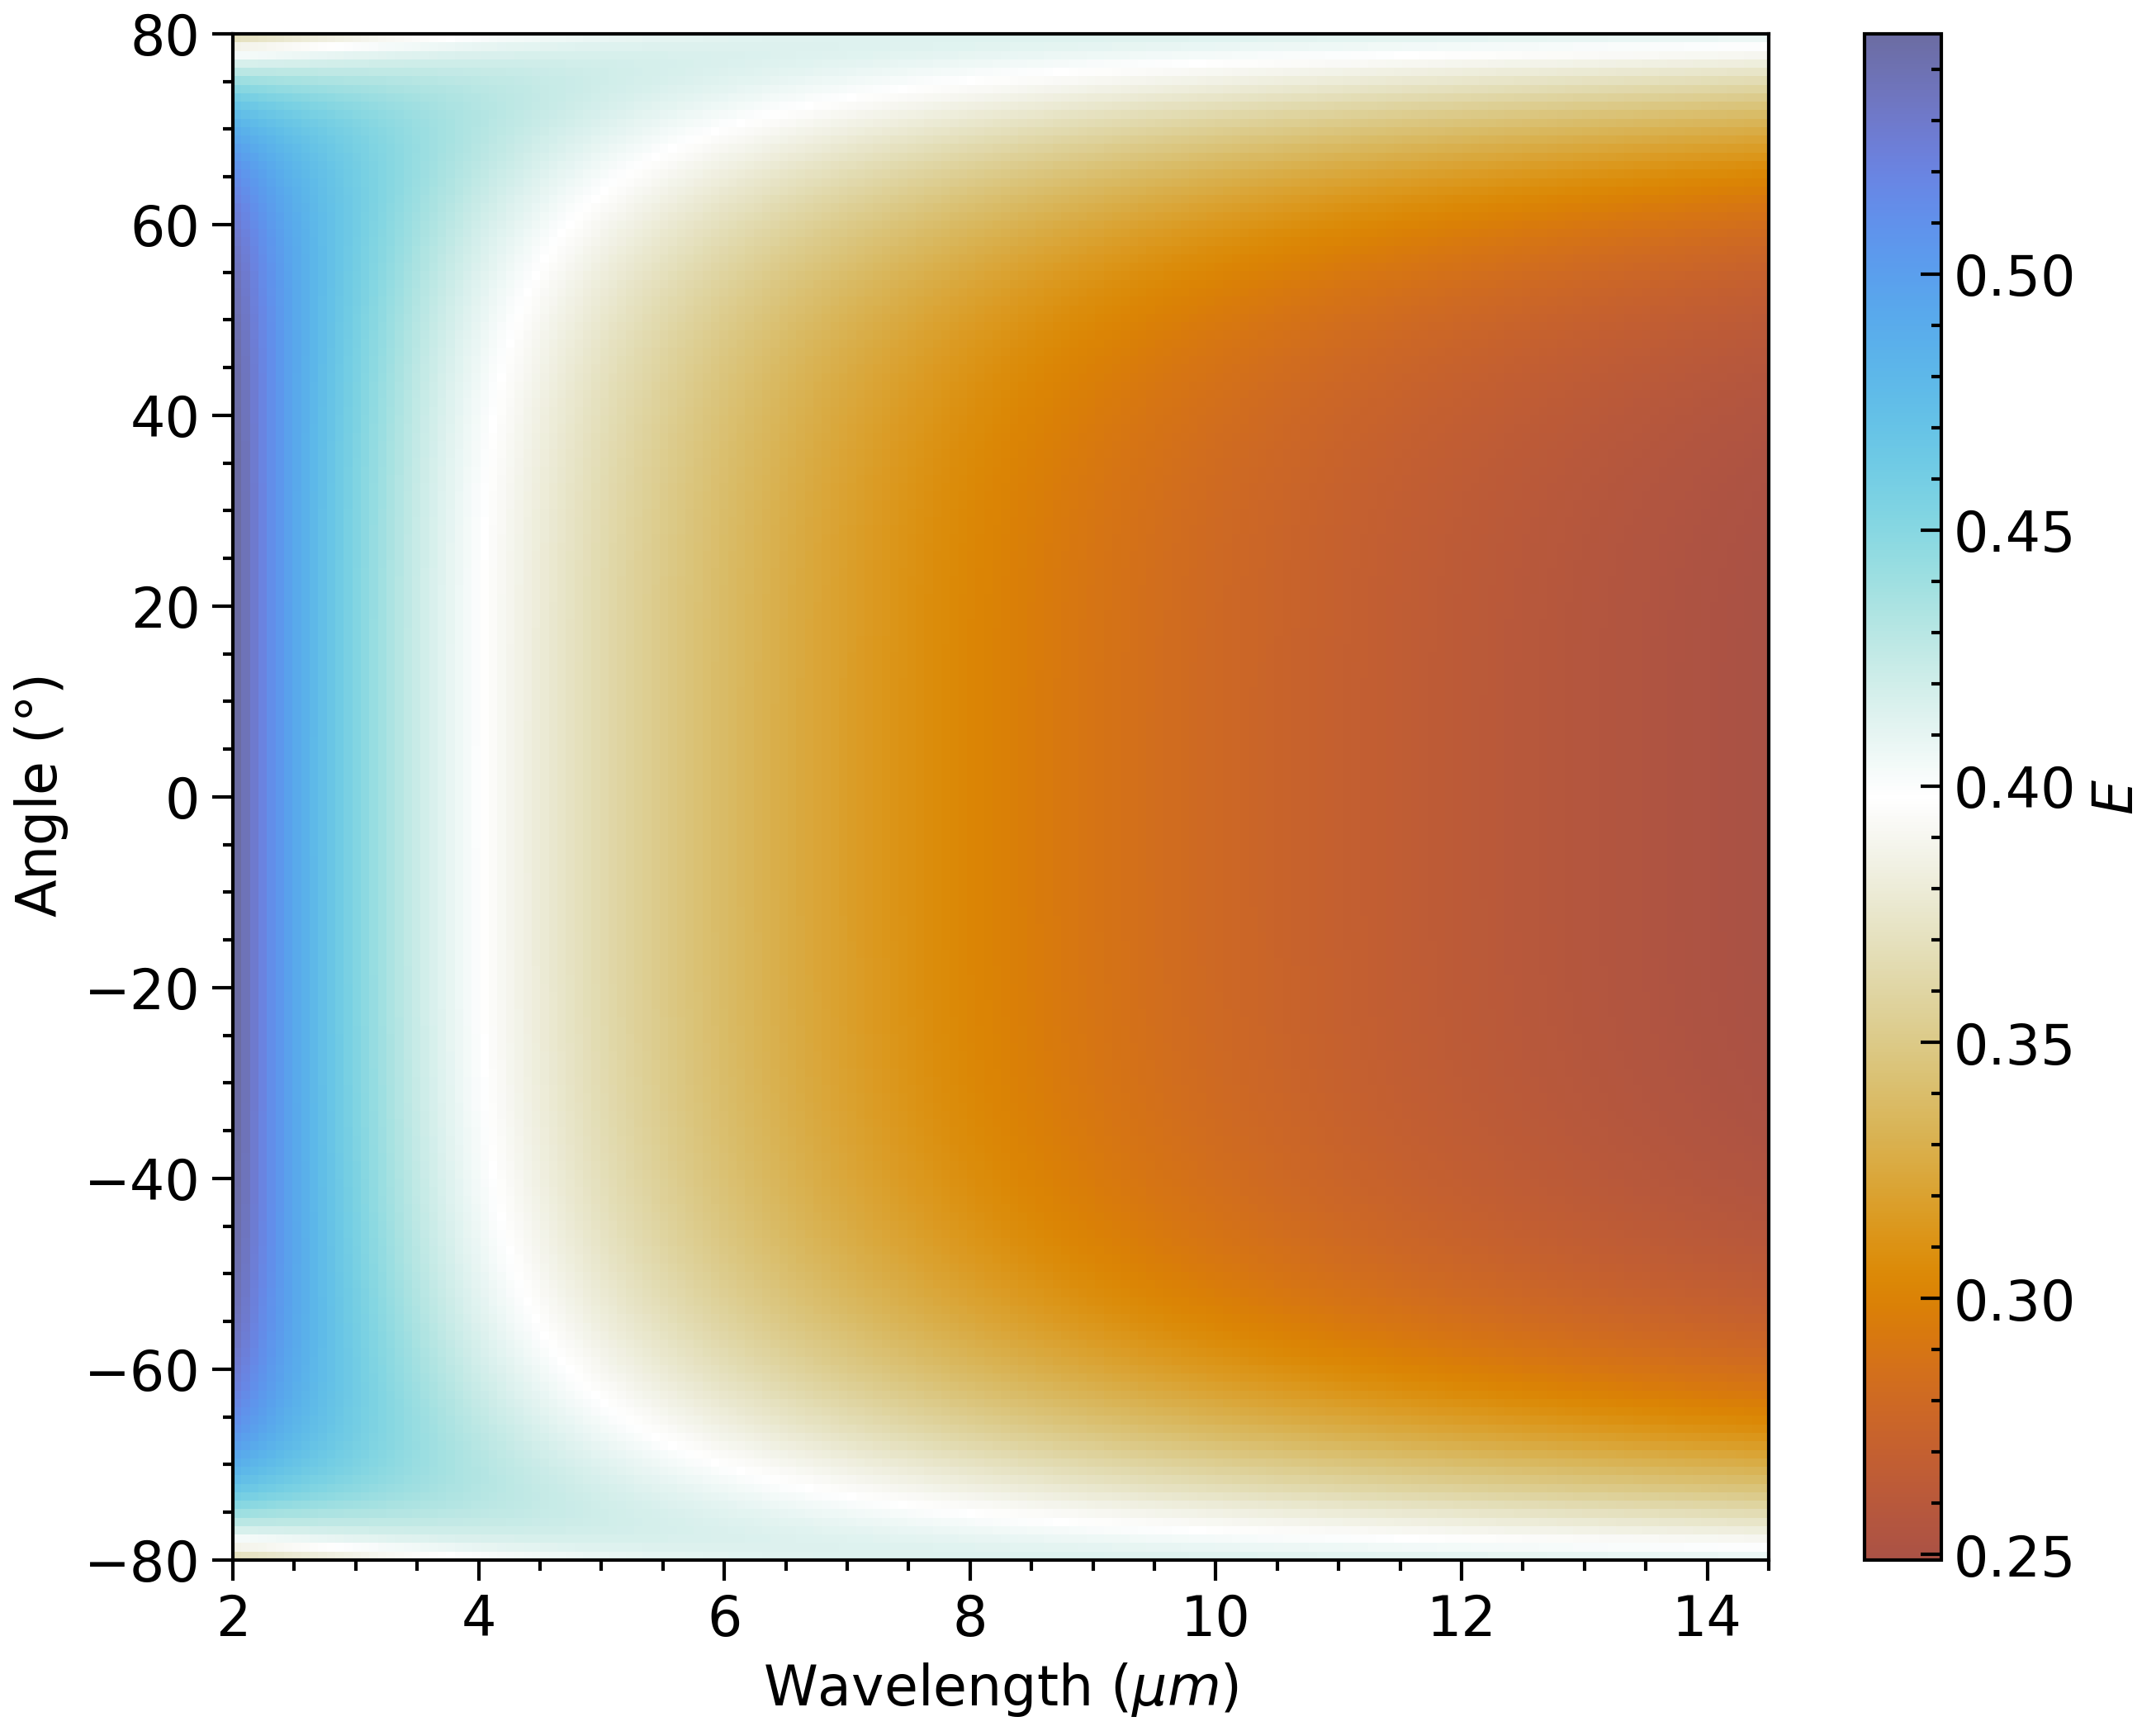

In [ ]:
X, Y = np.meshgrid(lbda_sample/1000, angle_arr)

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
plt.imshow(1-R5-T5, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', aspect='auto', cmap=cm.prinsenvlag)
plt.colorbar(label='$E$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Angle ($\degree$)')


# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [ ]:
fig.savefig("angle_E_0d5.svg", transparent=True)

# Thickness vs. R

## Single Slab without Au ground plane

In [ ]:
lbda_sample = np.linspace(2000, 14500, 1000)
thickness_arr = np.linspace(100, 10000, len(lbda_sample))
R3 = np.zeros((len(lbda_sample), len(thickness_arr)))
R5 = np.zeros((len(lbda_sample), len(thickness_arr)))
T3 = np.zeros((len(lbda_sample), len(thickness_arr)))
T5 = np.zeros((len(lbda_sample), len(thickness_arr)))

In [ ]:
for i, t in enumerate(thickness_arr):
  s = elli.Structure(elli.AIR, [elli.Layer(fitted_model3.get_mat(), t)], elli.AIR)
  data = elli.ResultList([s.evaluate(lbda_sample, 23)])
  R3[i,:] = data.R
  T3[i,:] = data.T

In [ ]:
for i, t in enumerate(thickness_arr):
  s = elli.Structure(elli.AIR, [elli.Layer(fitted_model5.get_mat(), t)], elli.AIR)
  data = elli.ResultList([s.evaluate(lbda_sample, 23)])
  R5[i,:] = data.R
  T5[i,:] = data.T

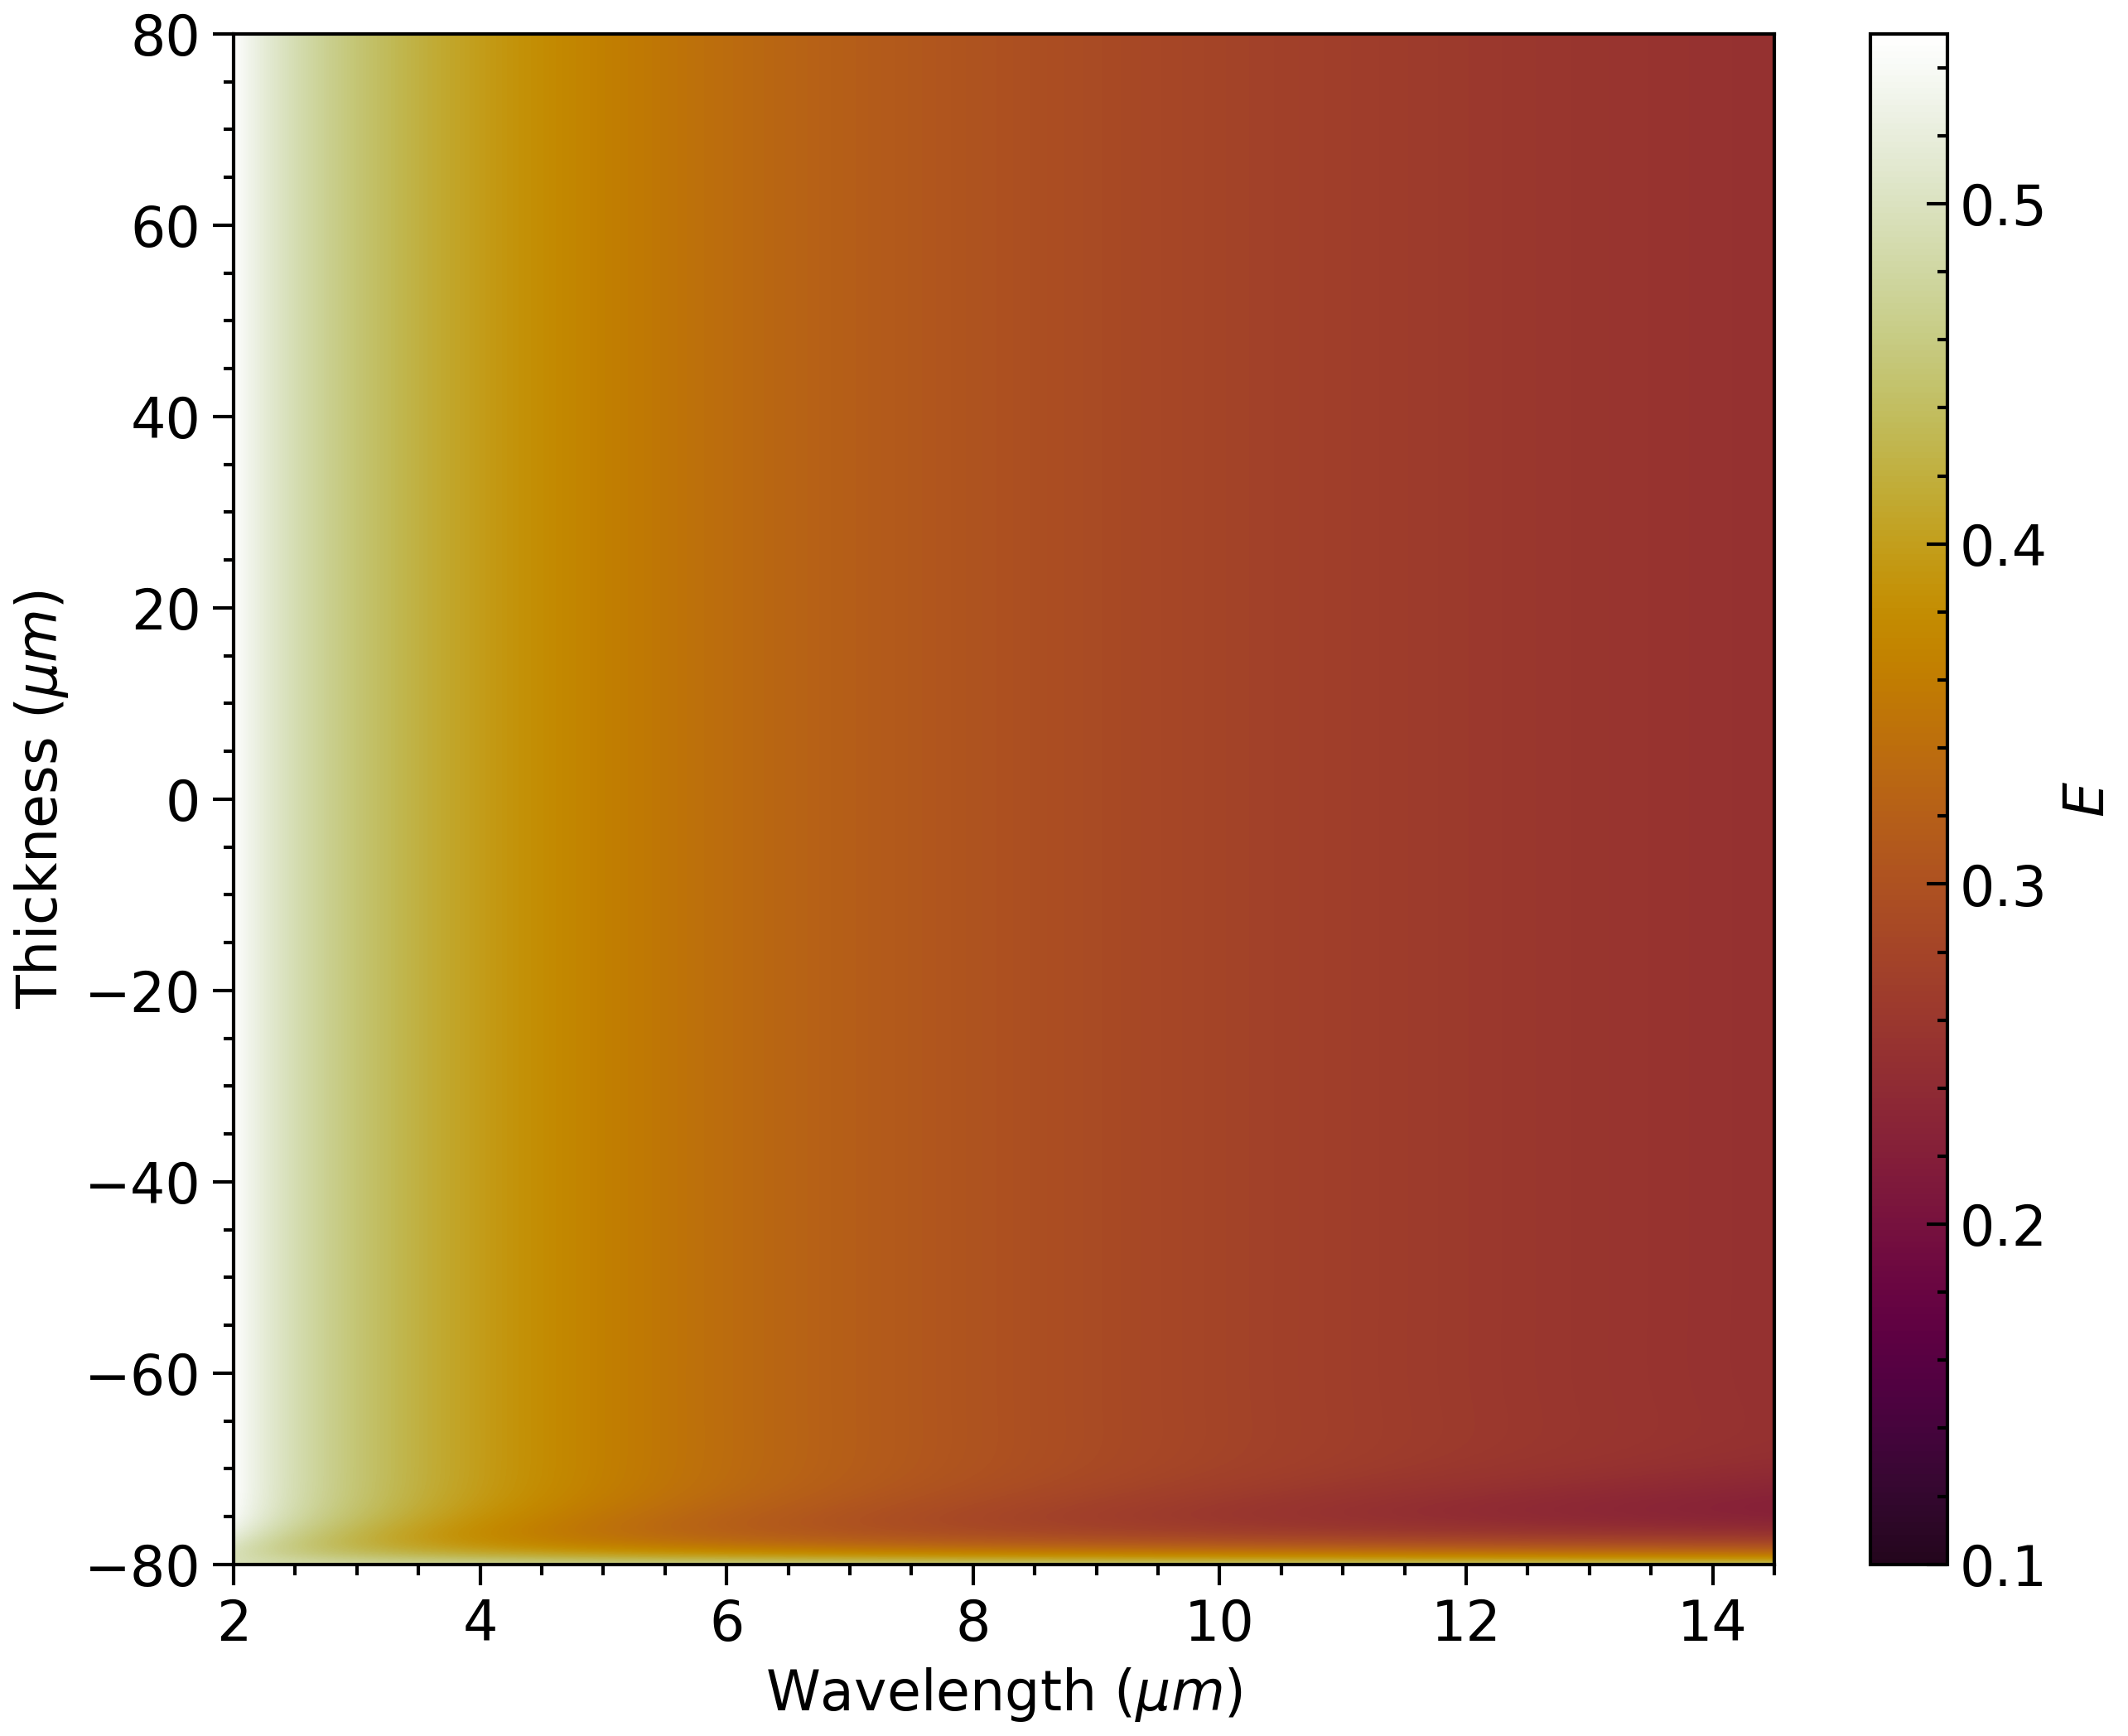

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
plt.imshow(1-R5-T5, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', aspect='auto', cmap=cm.fall, vmin=0.1, vmax=0.55)
plt.colorbar(label='$E$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Thickness ($\mu m$)')

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [ ]:
fig.savefig("thickness_noAu_E_0d5.svg", transparent=True)

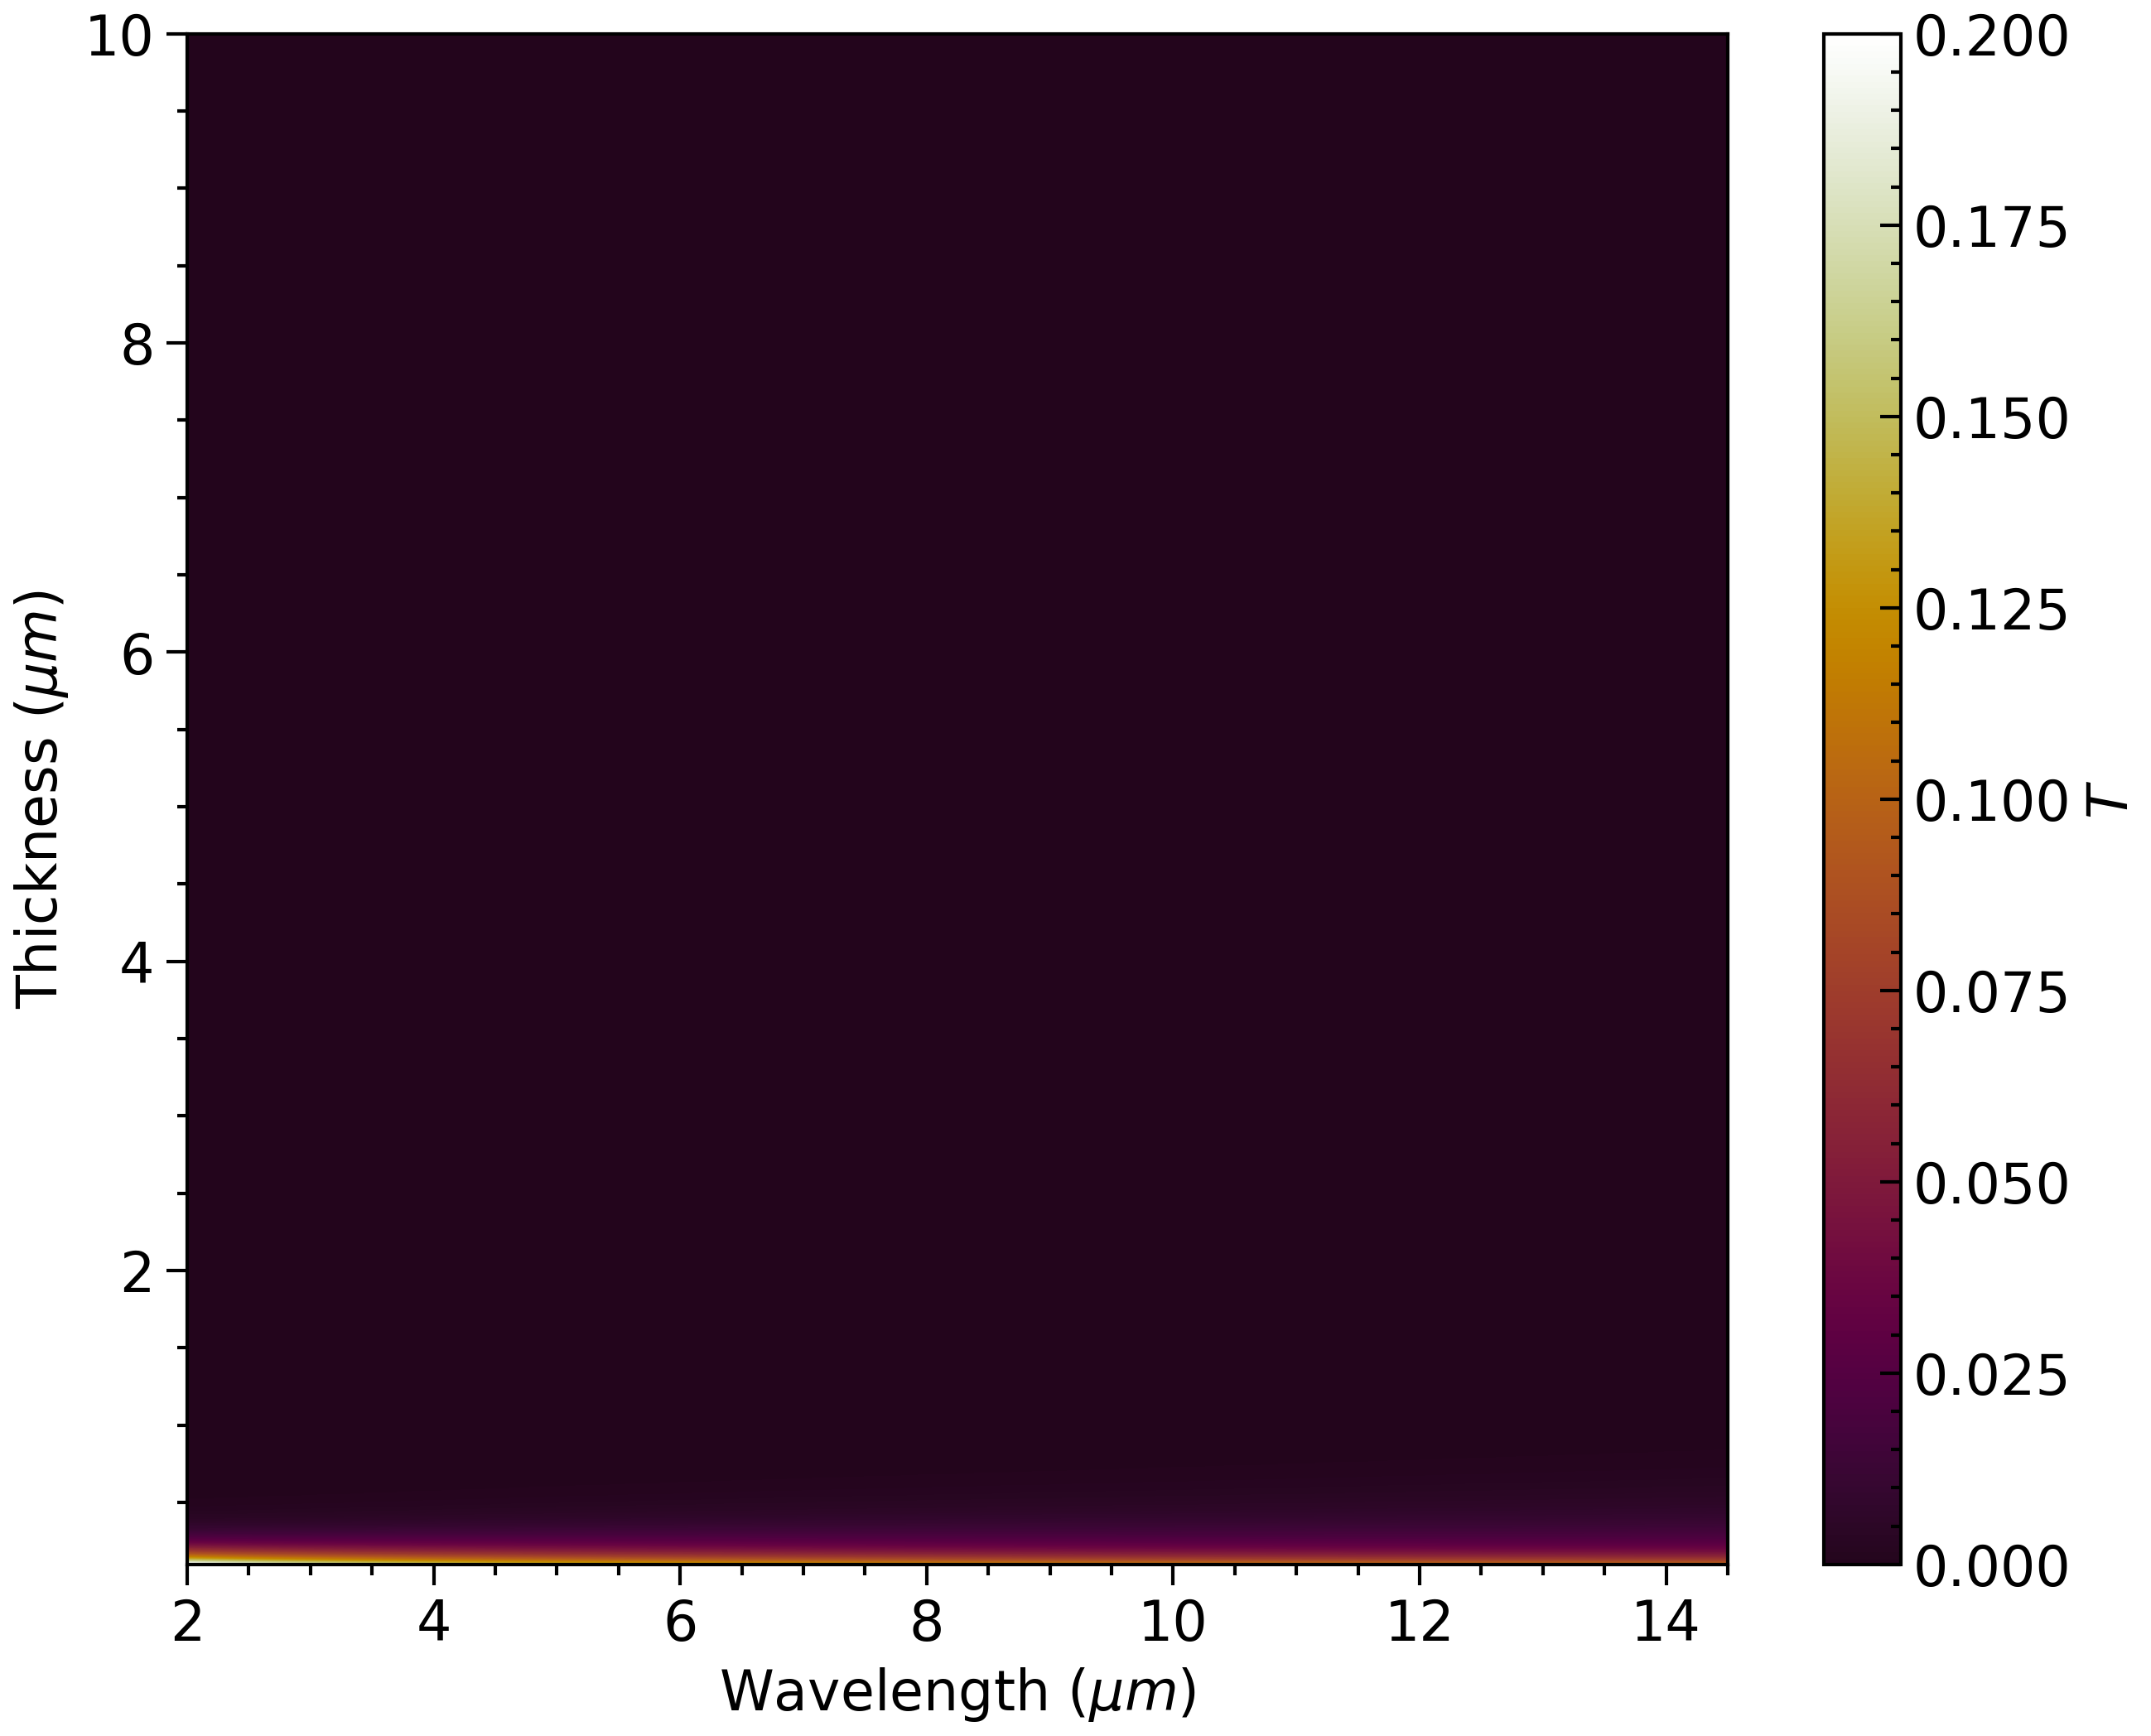

In [ ]:
X, Y = np.meshgrid(lbda_sample/1000, thickness_arr/1000)

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
plt.imshow(T5, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', aspect='auto', cmap=cm.fall, vmin=0, vmax=0.2)
plt.colorbar(label='$T$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Thickness ($\mu m$)')

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [ ]:
fig.savefig("thickness_noAu_T_0d5.svg", transparent=True)

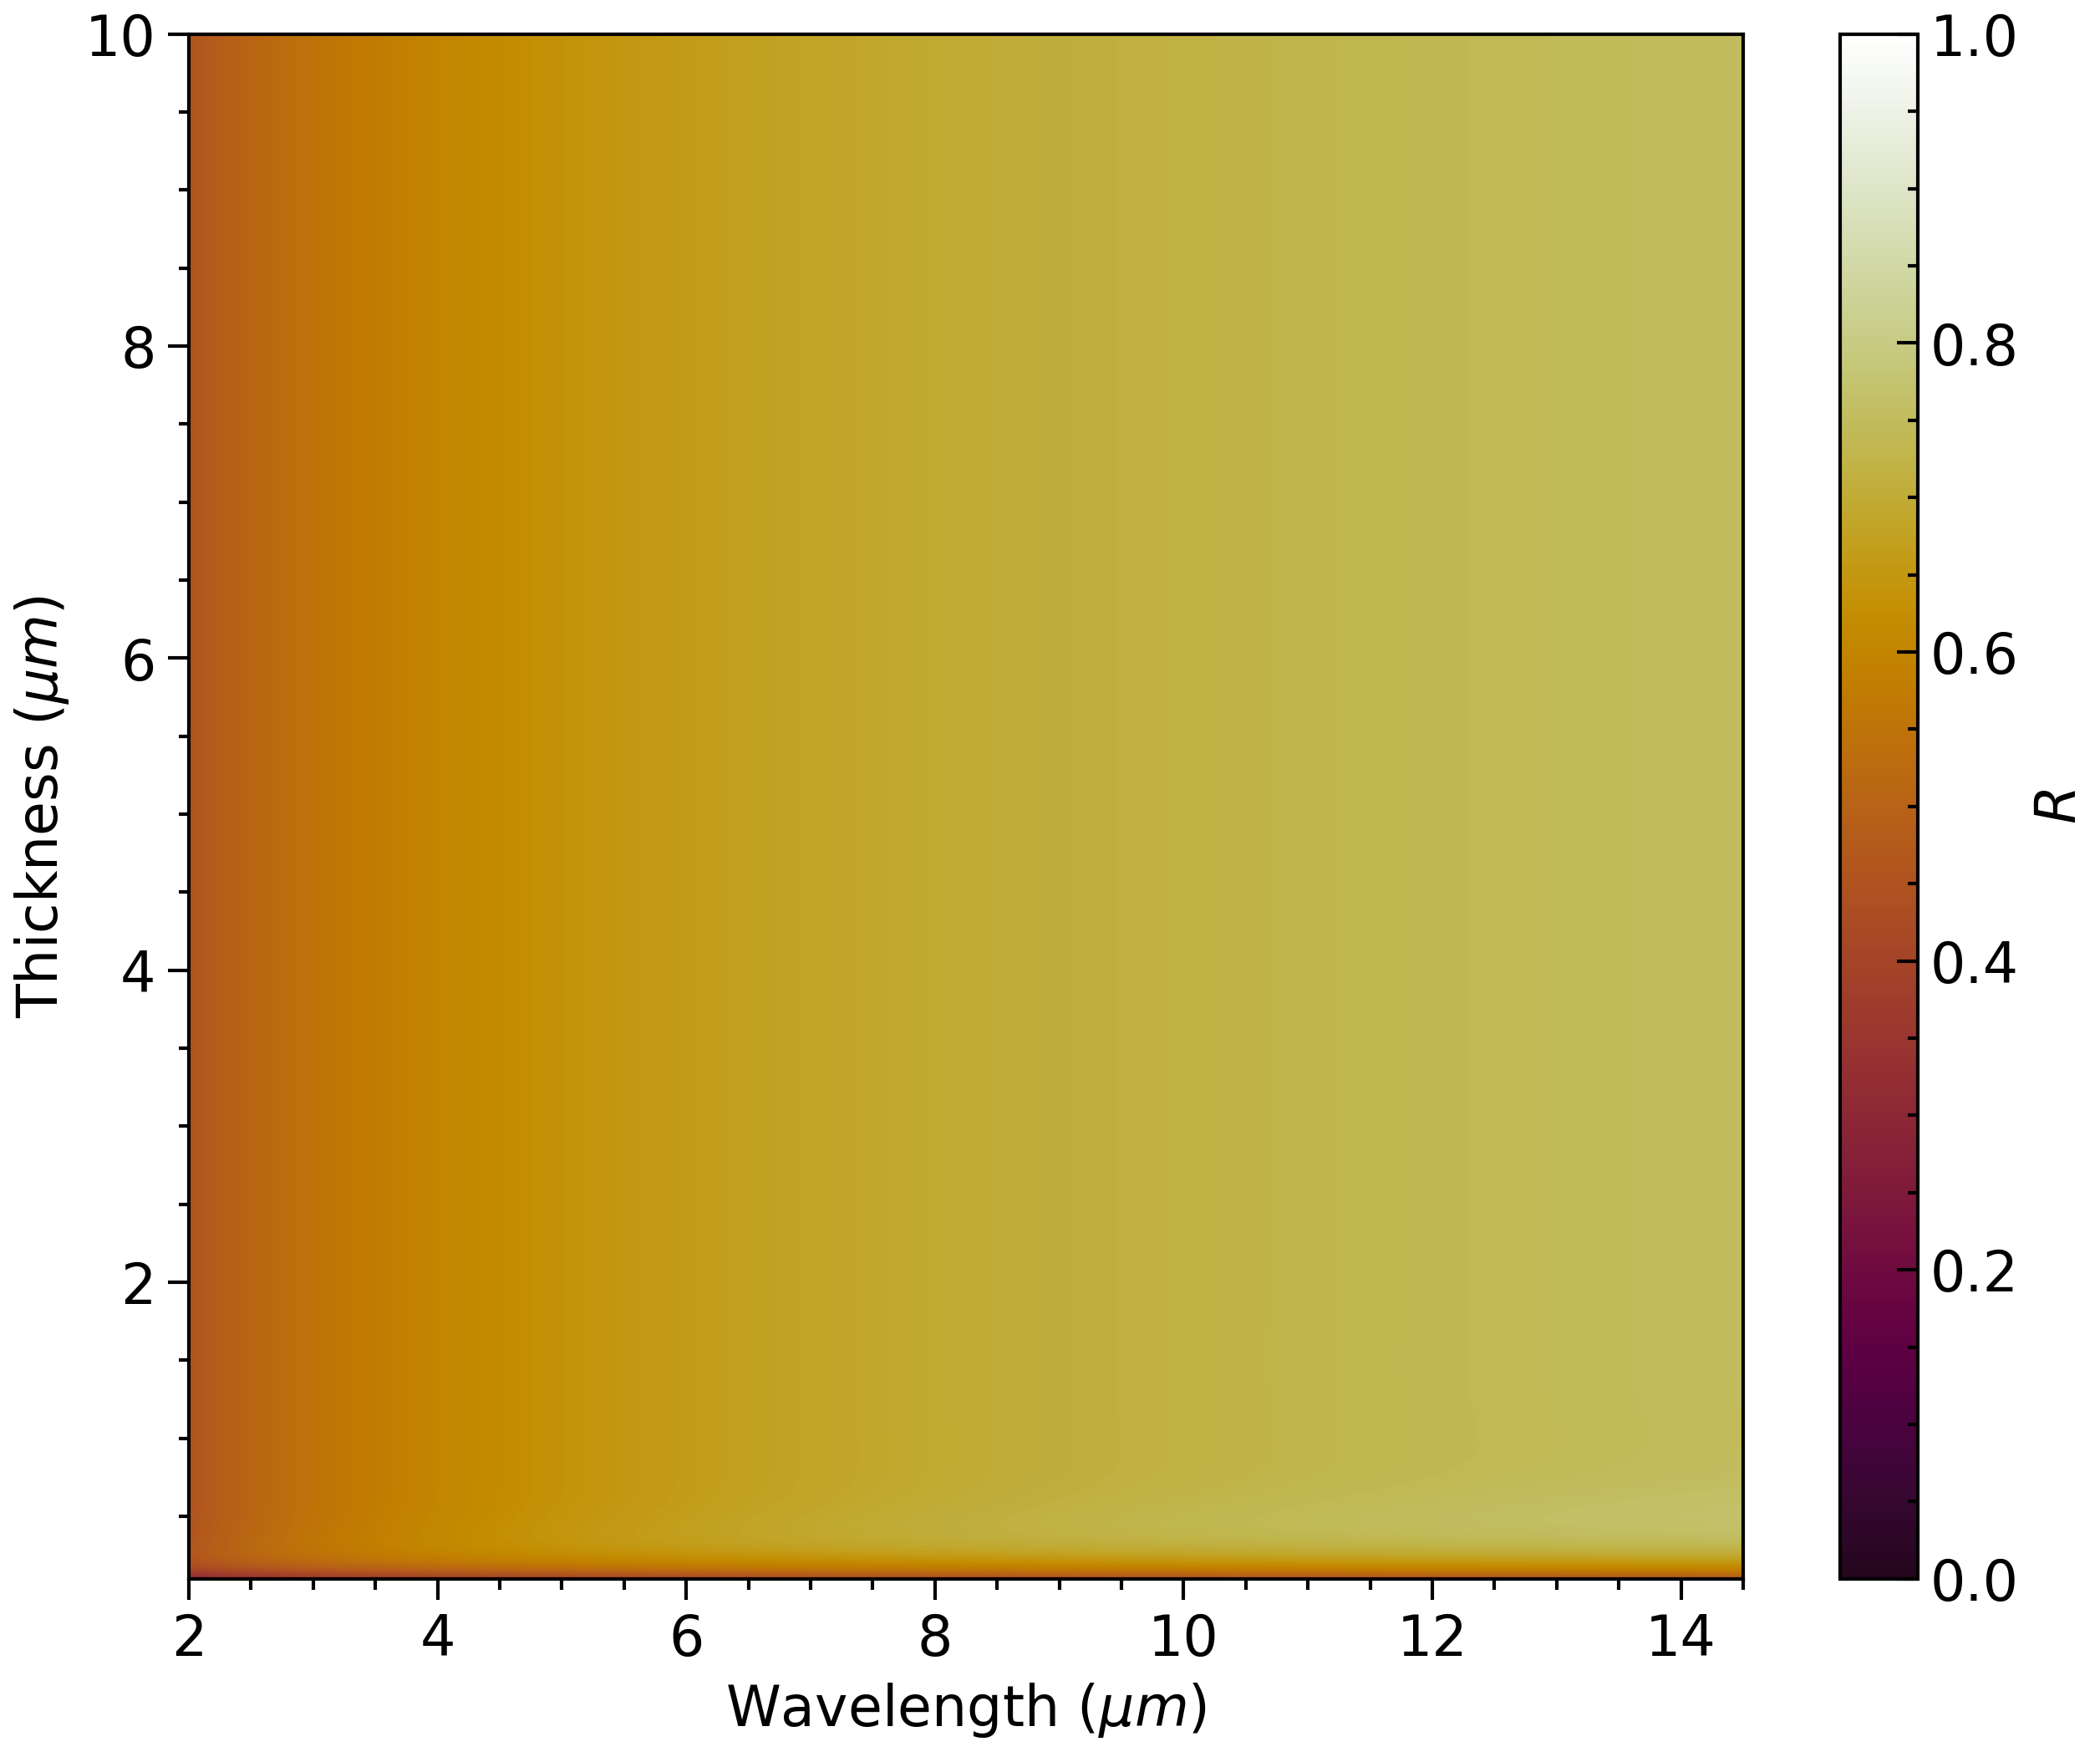

In [ ]:
X, Y = np.meshgrid(lbda_sample/1000, thickness_arr/1000)

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
plt.imshow(R5, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', aspect='auto', cmap=cm.fall, vmin=0, vmax=1)
plt.colorbar(label='$R$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Thickness ($\mu m$)')

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [ ]:
fig.savefig("thickness_noAu_R_0d5.svg", transparent=True)

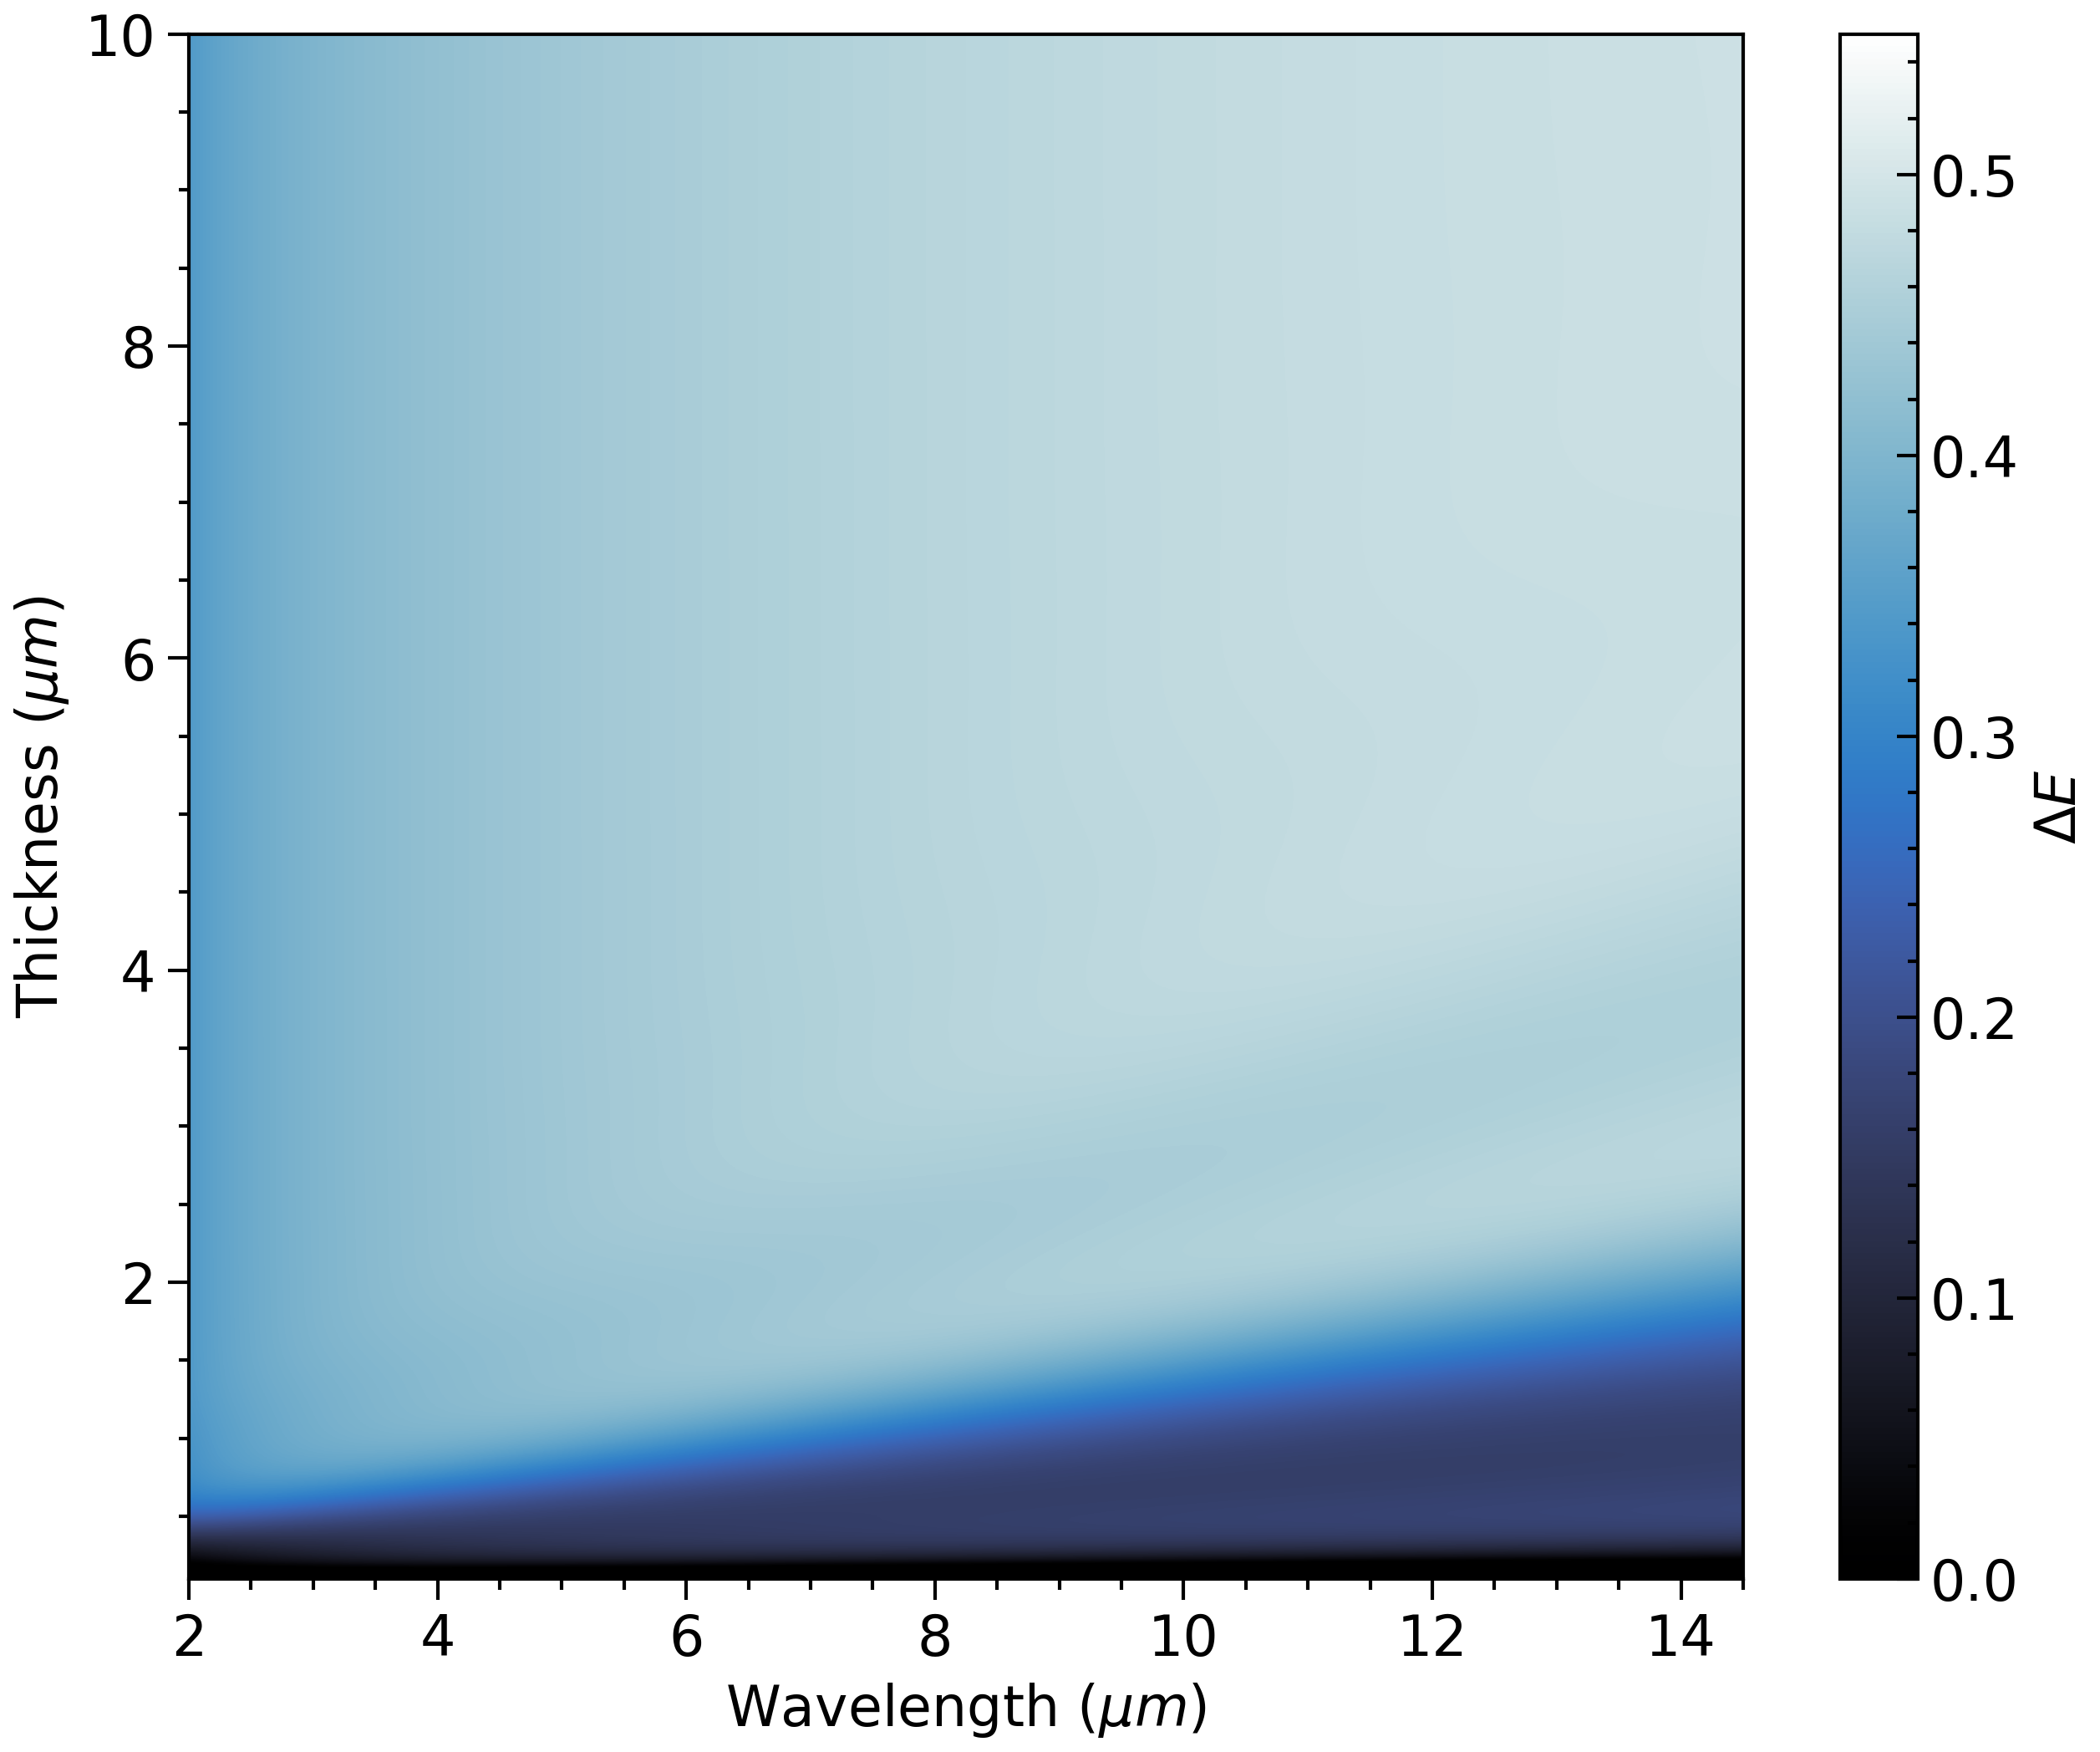

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
plt.imshow(R5+T5-R3-T3, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', aspect='auto', cmap=cm.arctic, vmin=0, vmax=0.55)
plt.colorbar(label='$\Delta E$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Thickness ($\mu m$)')

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [ ]:
fig.savefig("thickness_noAu_deltaE.svg", transparent=True)

## Slab with Au ground plane

In [ ]:
lbda_sample = np.linspace(2000, 14500, 1000)
thickness_arr = np.linspace(100, 10000, len(lbda_sample))
R3 = np.zeros((len(lbda_sample), len(thickness_arr)))
R5 = np.zeros((len(lbda_sample), len(thickness_arr)))
T3 = np.zeros((len(lbda_sample), len(thickness_arr)))
T5 = np.zeros((len(lbda_sample), len(thickness_arr)))

In [ ]:
for i, t in enumerate(thickness_arr):
  s = elli.Structure(elli.AIR, [elli.Layer(fitted_model3.get_mat(), t)], Au)
  data = elli.ResultList([s.evaluate(lbda_sample, 23)])
  R3[i,:] = data.R
  T3[i,:] = data.T

In [ ]:
for i, t in enumerate(thickness_arr):
  s = elli.Structure(elli.AIR, [elli.Layer(fitted_model5.get_mat(), t)], Au)
  data = elli.ResultList([s.evaluate(lbda_sample, 23)])
  R5[i,:] = data.R
  T5[i,:] = data.T

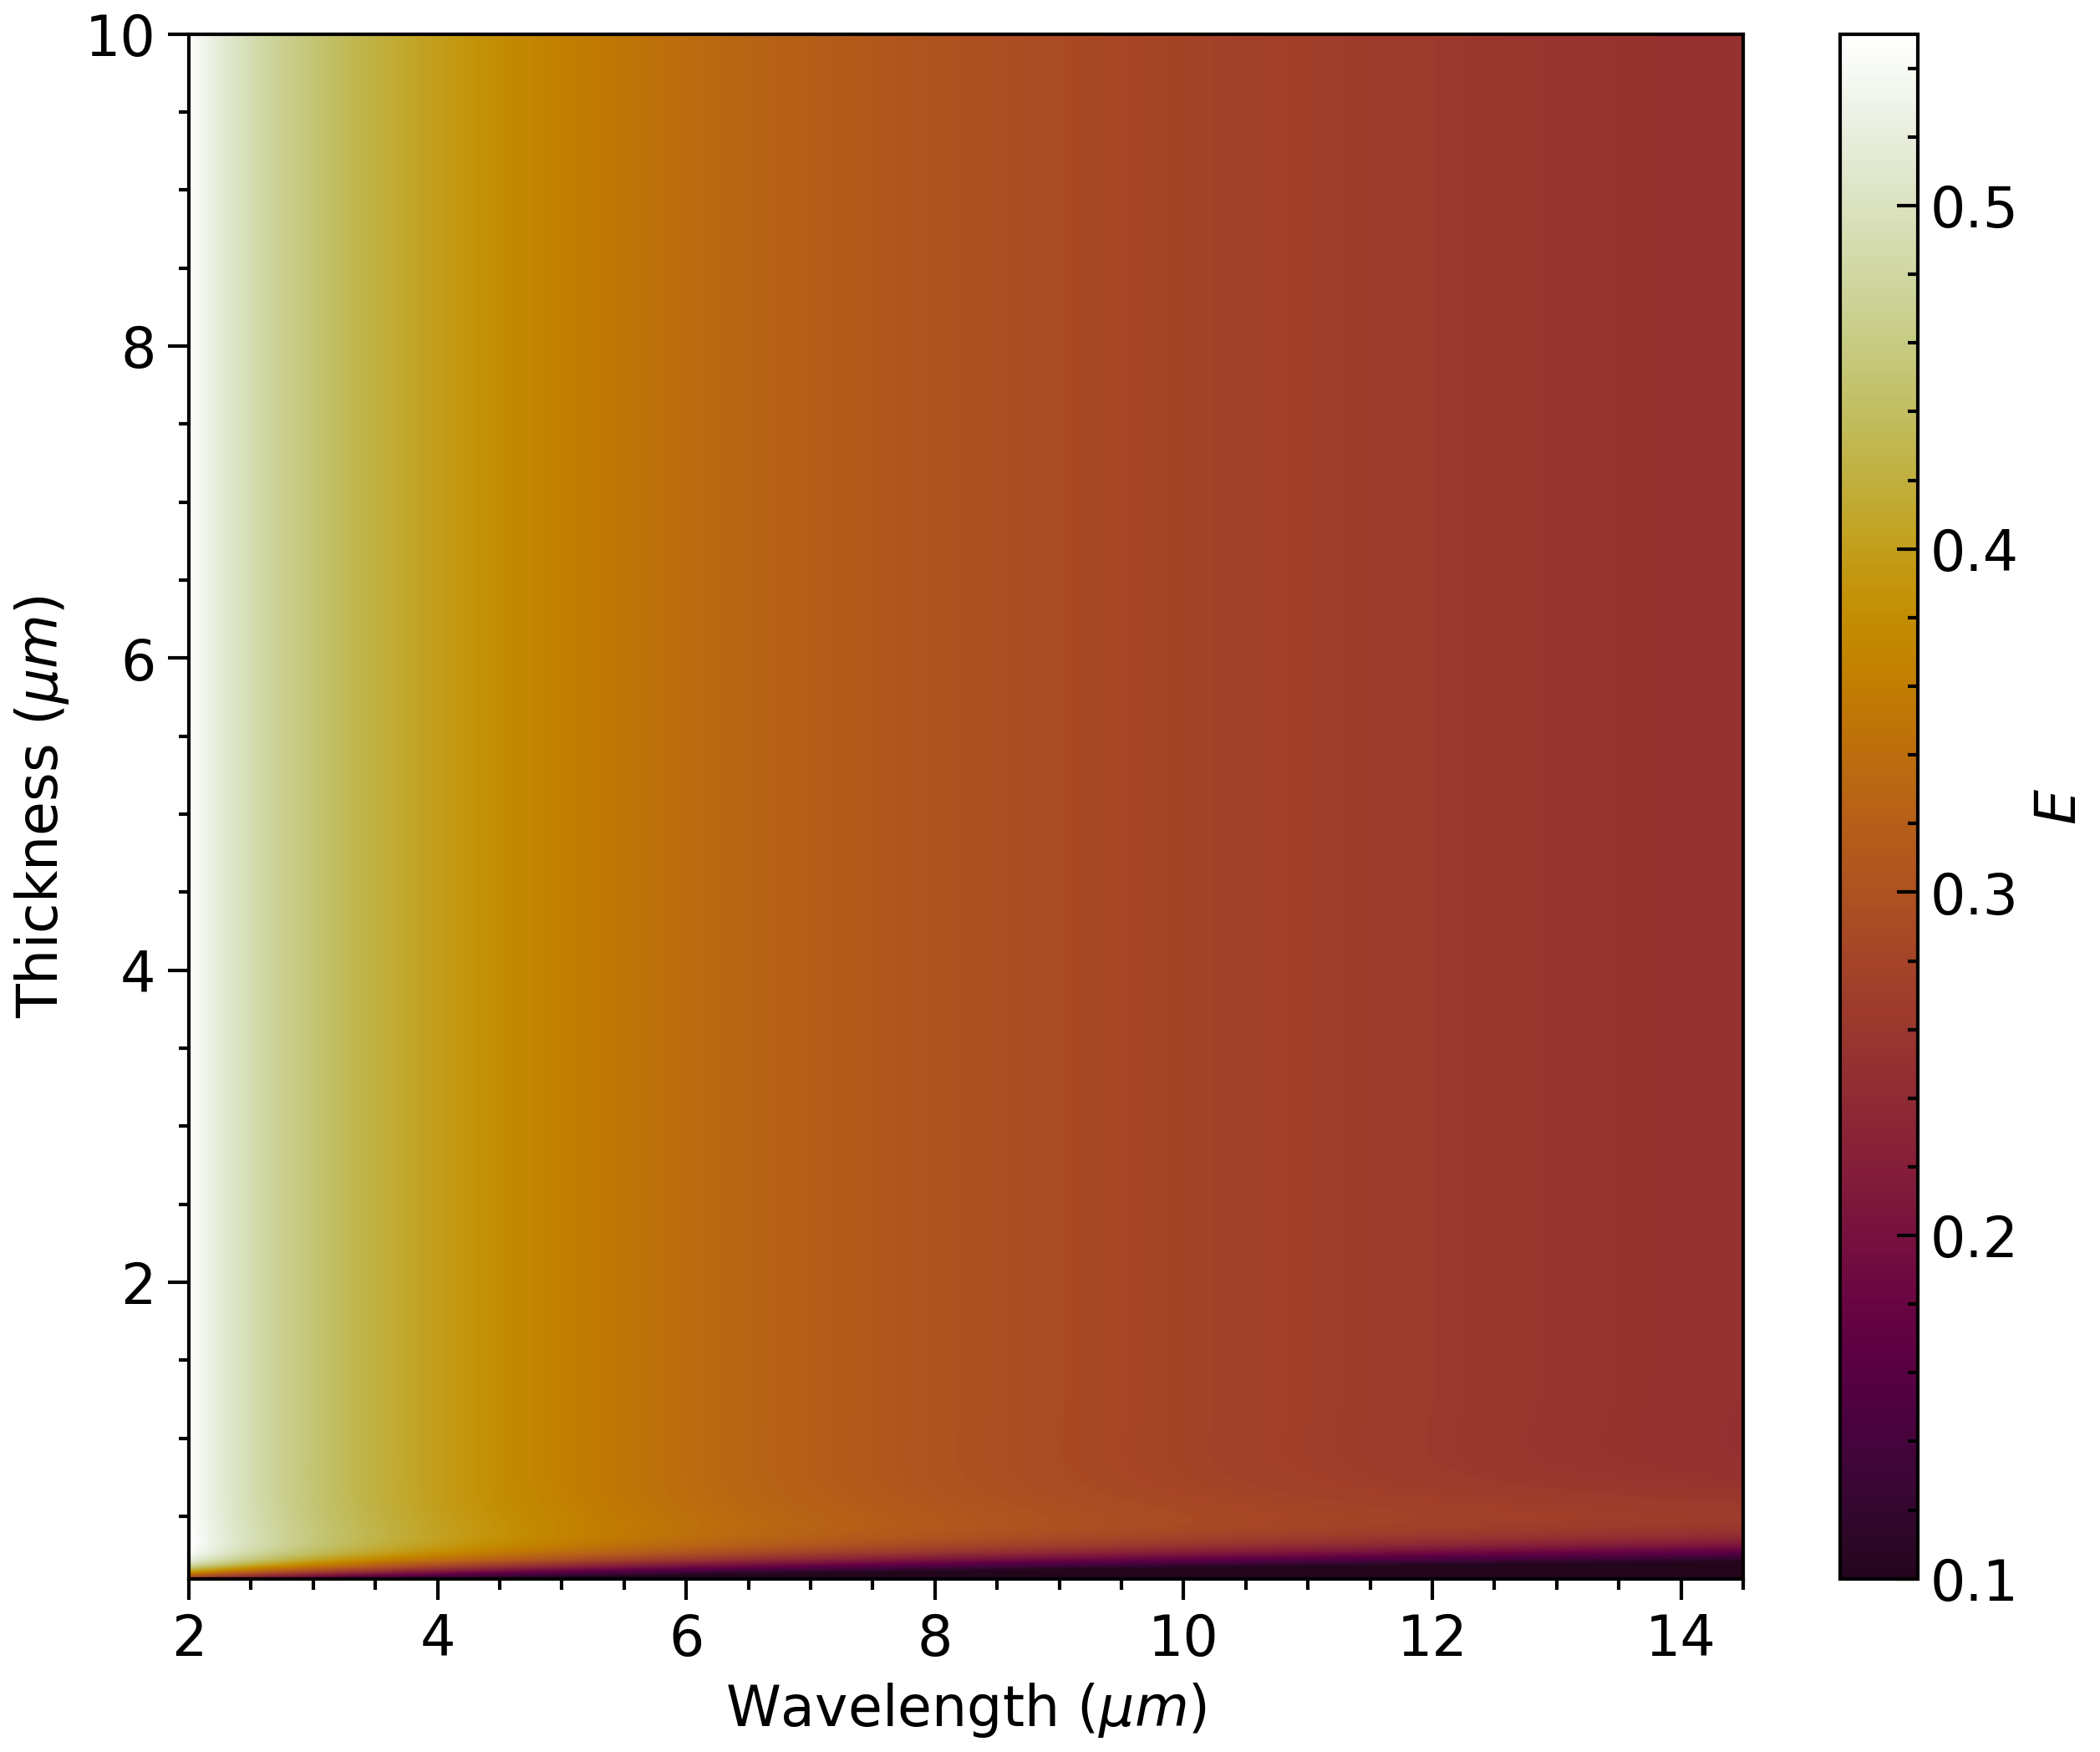

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
plt.imshow(1-R5-T5, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', aspect='auto', cmap=cm.fall, vmin=0.1, vmax=0.55)
plt.colorbar(label='$E$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Thickness ($\mu m$)')

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [ ]:
fig.savefig("thickness_Au_E_0d5.svg", transparent=True)

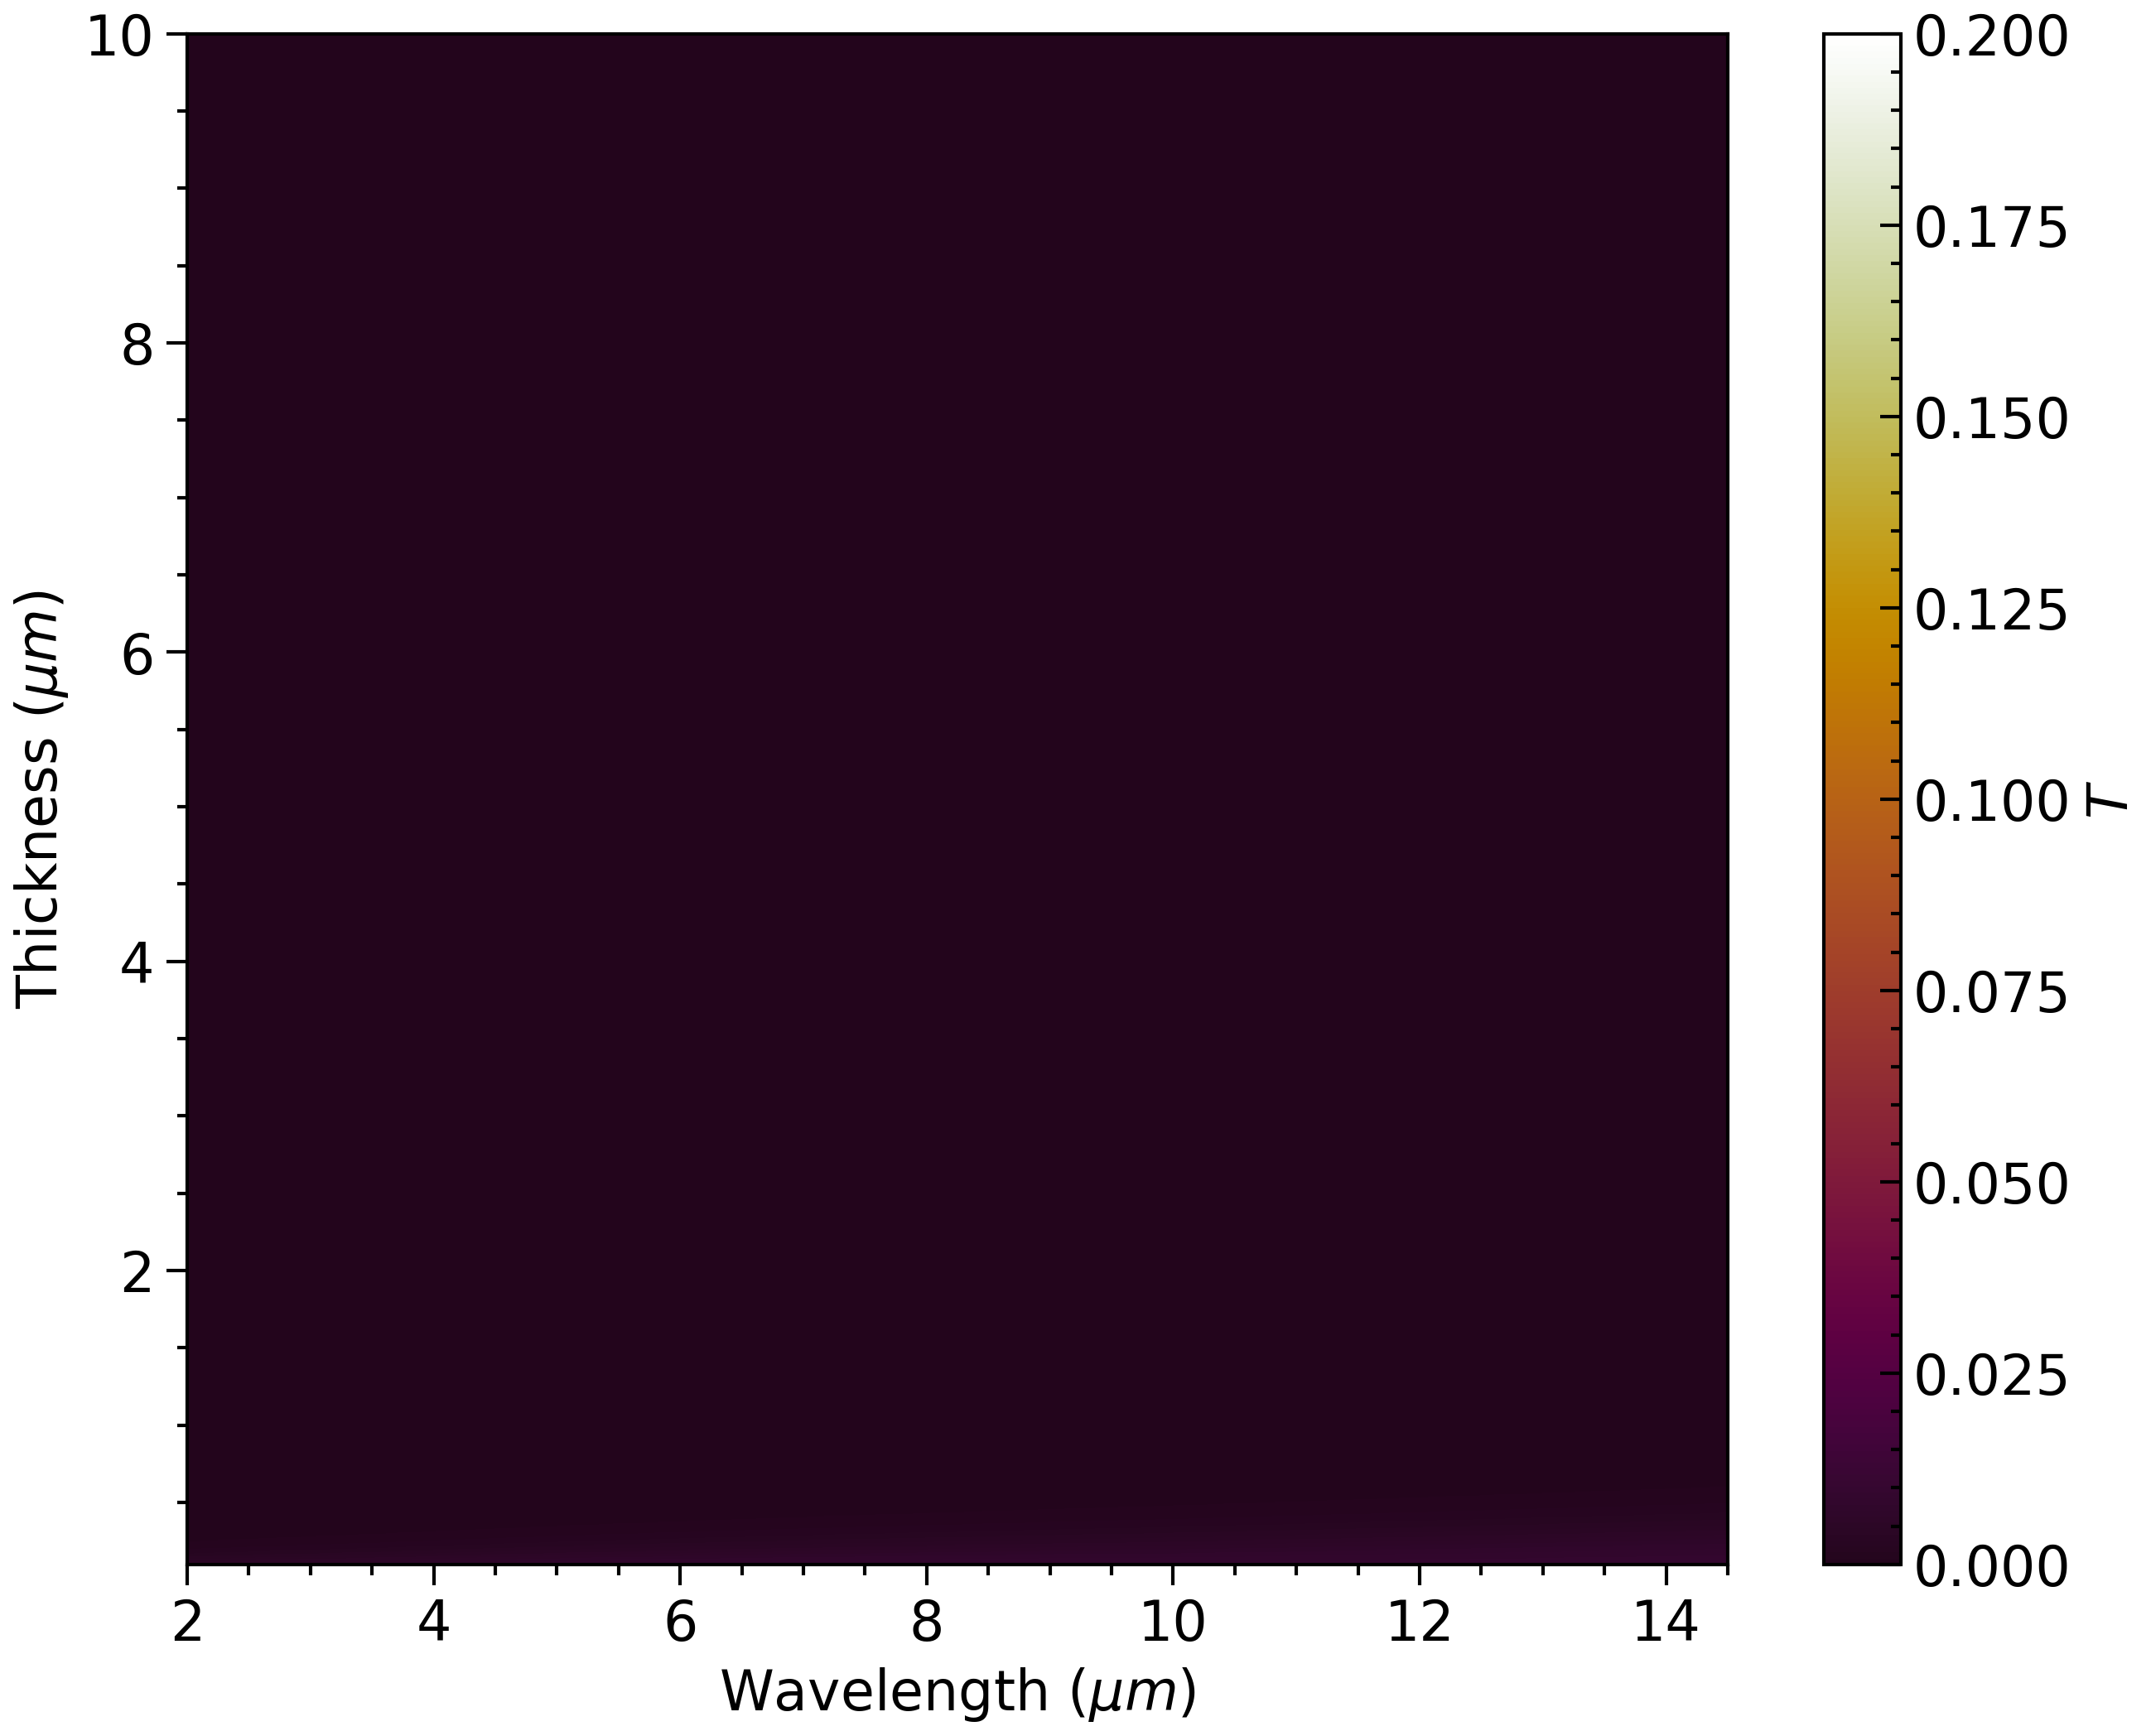

In [ ]:
X, Y = np.meshgrid(lbda_sample/1000, thickness_arr/1000)

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
plt.imshow(T5, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', aspect='auto', cmap=cm.fall, vmin=0, vmax=0.2)
plt.colorbar(label='$T$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Thickness ($\mu m$)')

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [ ]:
fig.savefig("thickness_Au_T_0d5.svg", transparent=True)

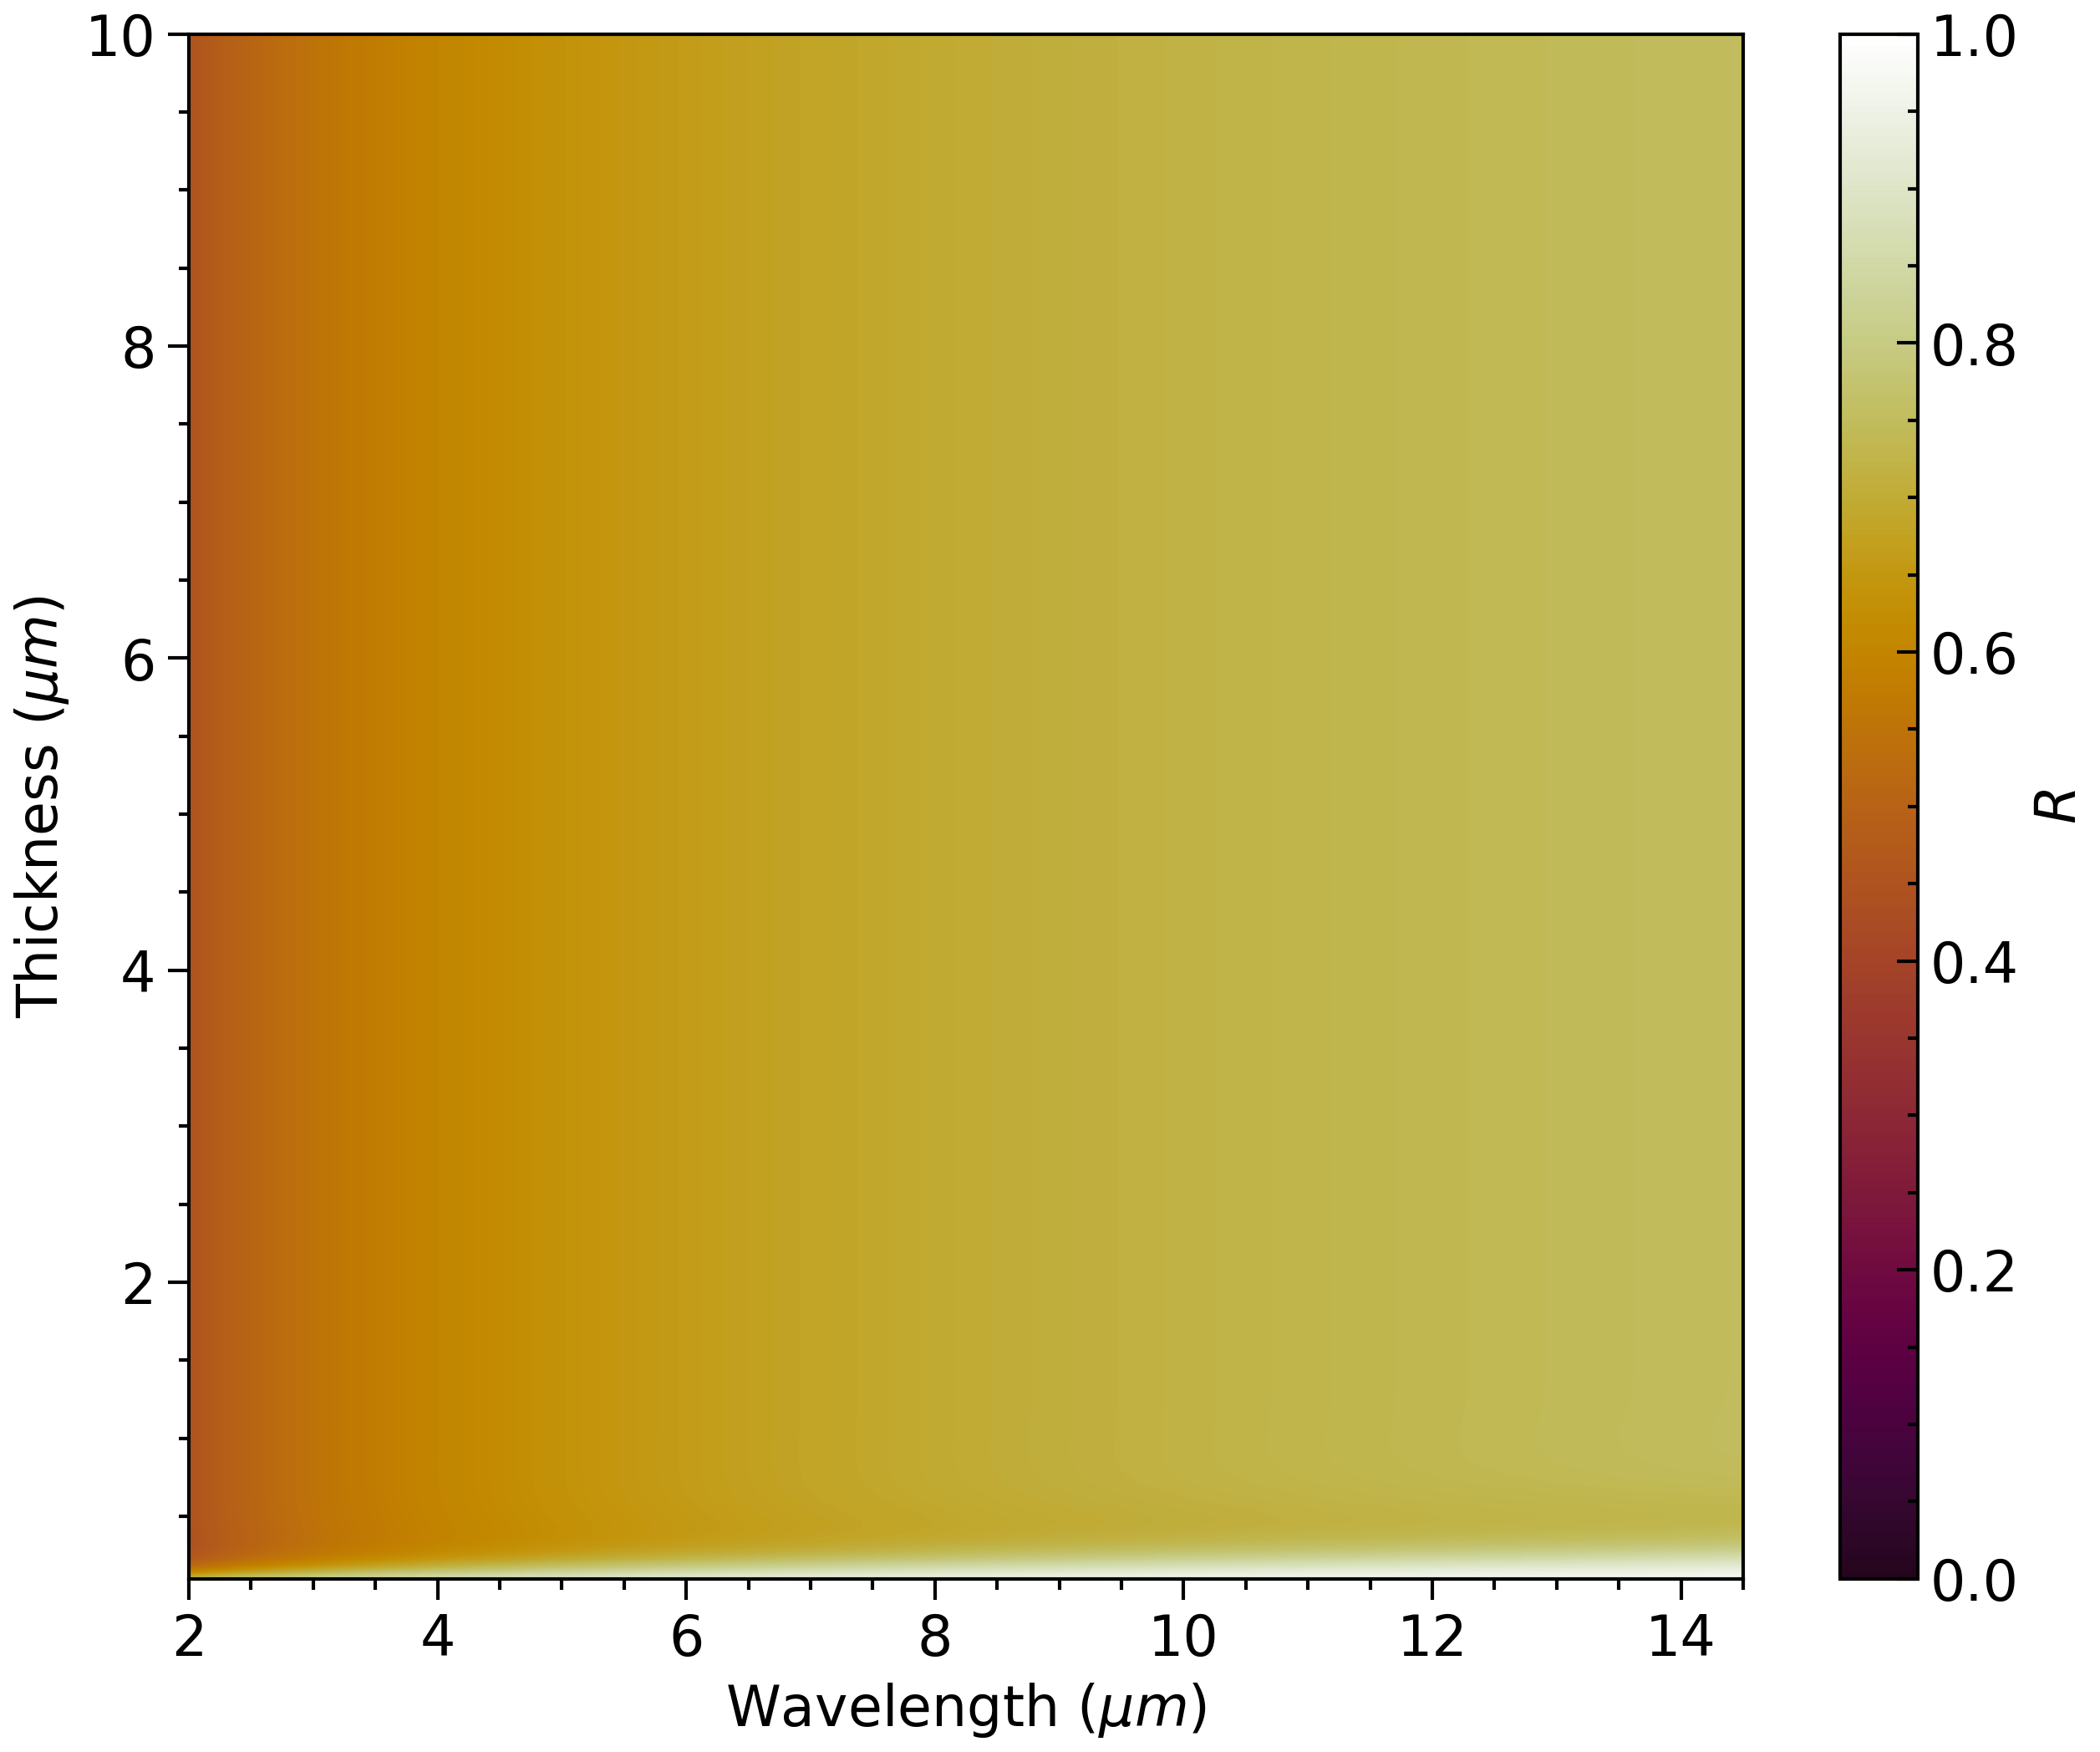

In [ ]:
X, Y = np.meshgrid(lbda_sample/1000, thickness_arr/1000)

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
plt.imshow(R5, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', aspect='auto', cmap=cm.fall, vmin=0, vmax=1)
plt.colorbar(label='$R$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Thickness ($\mu m$)')

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [ ]:
fig.savefig("thickness_Au_R_0d5.svg", transparent=True)

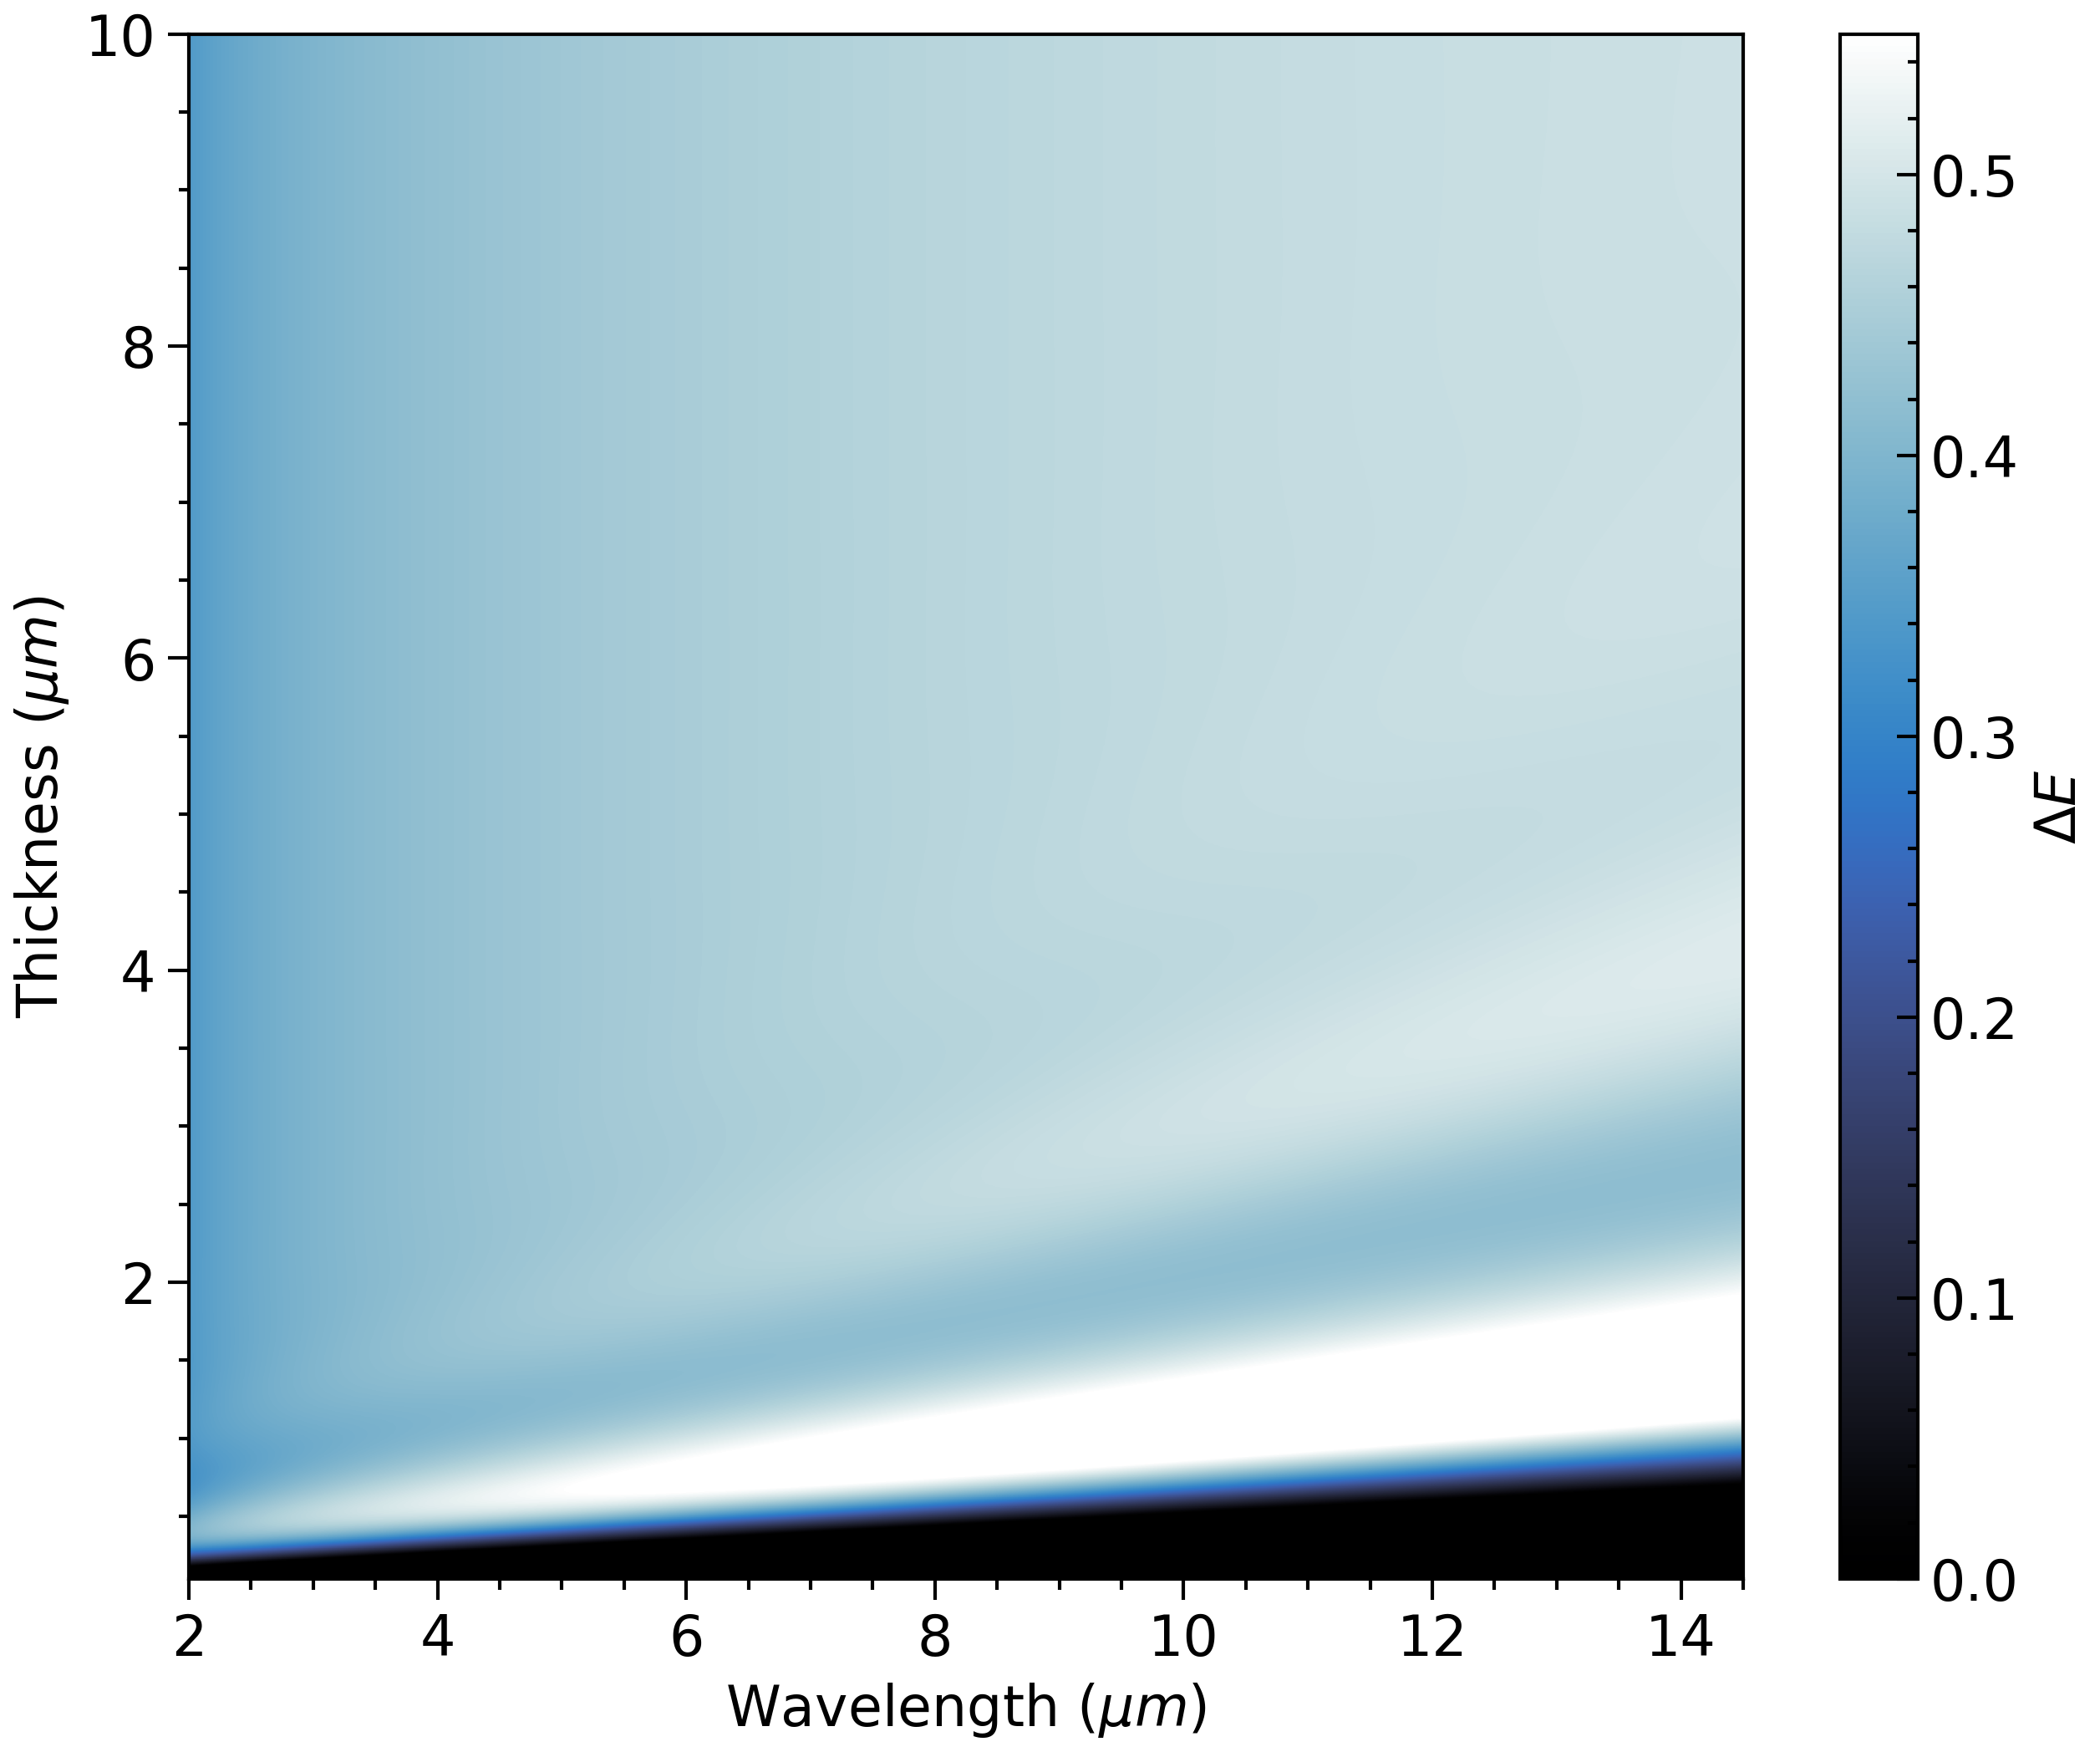

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
plt.imshow(R5+T5-R3-T3, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', aspect='auto', cmap=cm.arctic, vmin=0, vmax=0.55)
plt.colorbar(label='$\Delta E$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Thickness ($\mu m$)')

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [ ]:
fig.savefig("thickness_Au_deltaE.svg", transparent=True)

# Permitivity

In [ ]:
lbda_sample = np.linspace(100, 30000, 1000)

epsro = fitted_modelo.get_dielectric(lbda_sample)
epsr3 = fitted_model3.get_dielectric(lbda_sample)
epsr5 = fitted_model5.get_dielectric(lbda_sample)

In [ ]:
imag = elli.kkr.kkr.re2im_reciprocal(np.real(epsr3), lbda_sample)

In [ ]:
import pandas as pd

# Create a DataFrame to hold the data
df = pd.DataFrame({
    'Wavelength': lbda_sample/1000,
    'Fitted 0.5V Real': np.real(epsr5),
    'Fitted 0.5V Imag': np.imag(epsr5),
    'Fitted -0.3V Real': np.real(epsr3),
    'Fitted -0.3V Imag': np.imag(epsr3),
    'Fitted Pristine Real': np.real(epsro),
    'Fitted Pristine Imag': np.imag(epsro)
})

# Save the DataFrame to a CSV file
df.to_csv('epsilon_real_imag_data.csv', index=False)


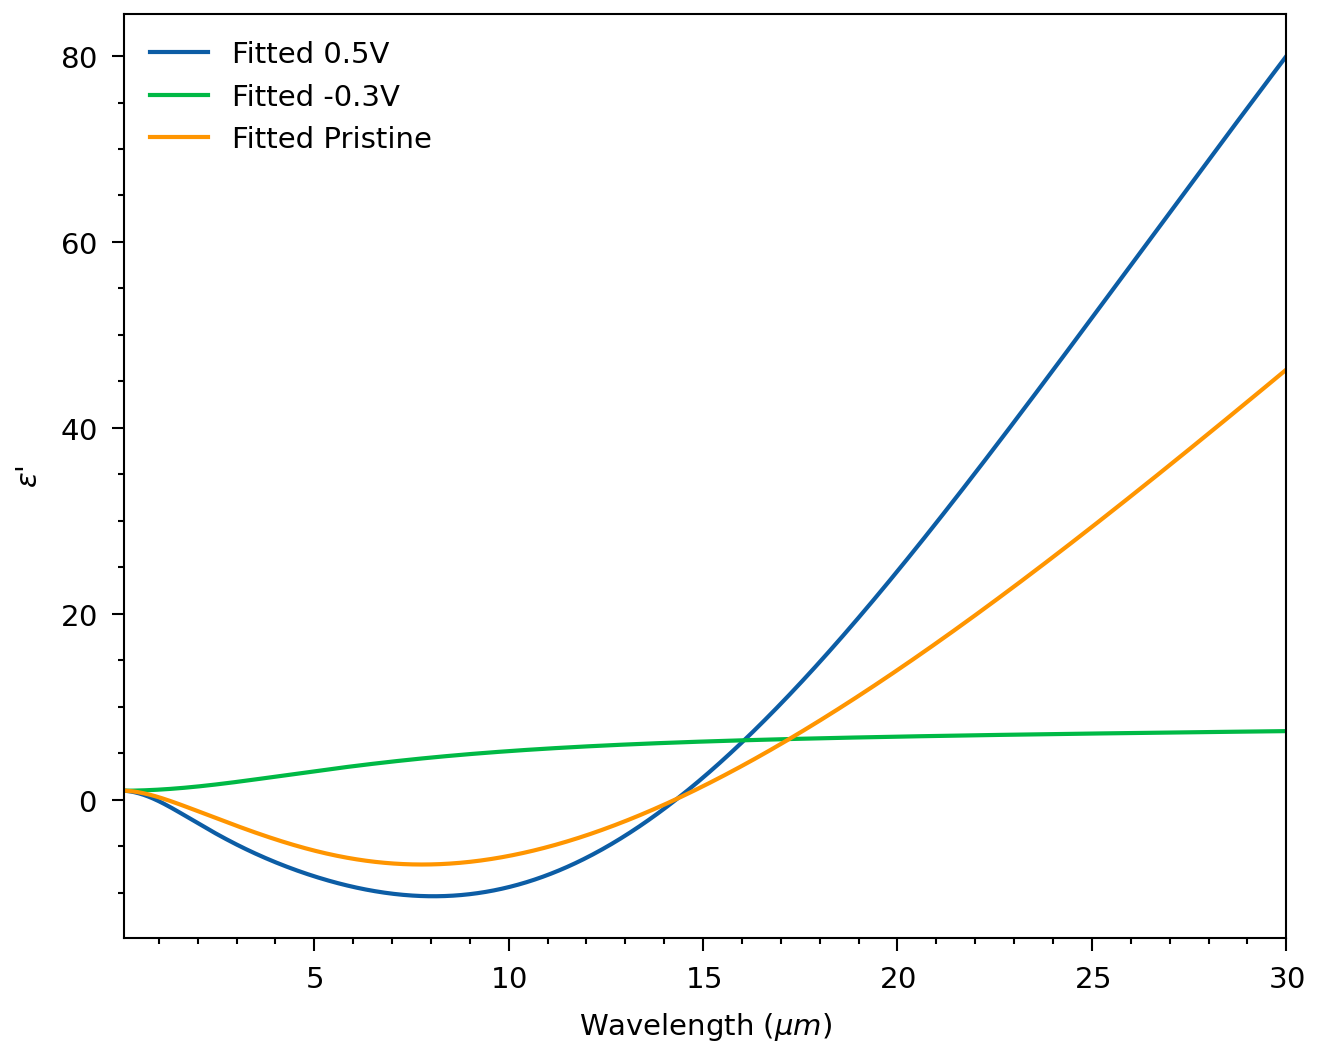

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
plt.plot(lbda_sample/1000, np.real(epsr5), label='Fitted 0.5V')
plt.plot(lbda_sample/1000, np.real(epsr3), label='Fitted -0.3V')
plt.plot(lbda_sample/1000, np.real(epsro), label='Fitted Pristine')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('$\epsilon$\'')
plt.xlim([np.min(lbda_sample/1000), np.max(lbda_sample/1000)])
plt.legend()

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [ ]:
fig.savefig("permitivity_real.svg", transparent=True)

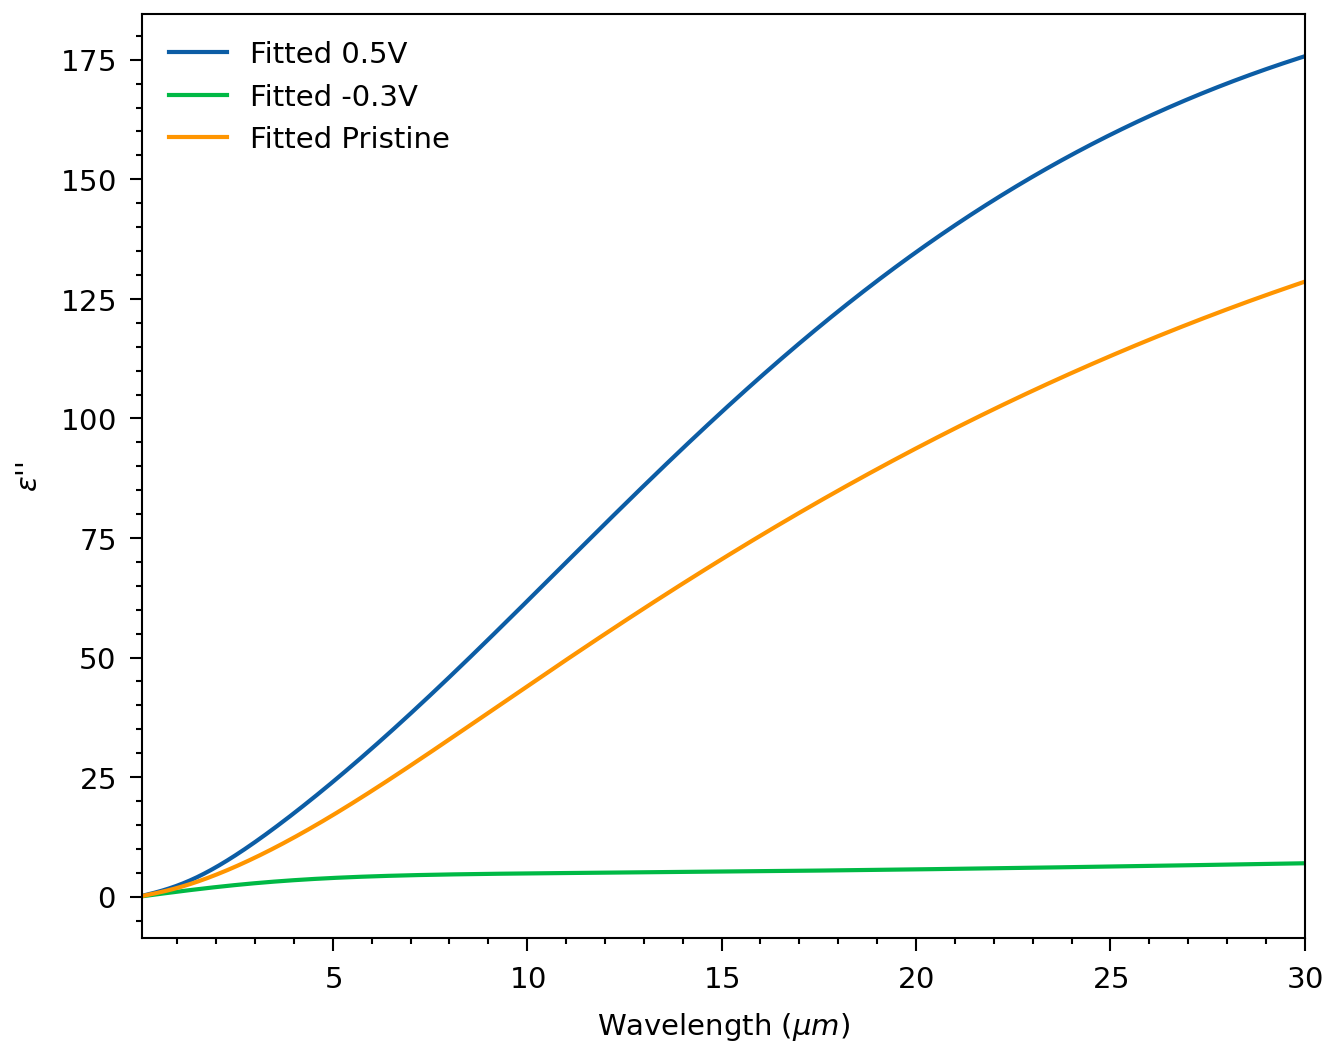

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
plt.plot(lbda_sample/1000, np.imag(epsr5), label='Fitted 0.5V')
plt.plot(lbda_sample/1000, np.imag(epsr3), label='Fitted -0.3V')
plt.plot(lbda_sample/1000, np.imag(epsro), label='Fitted Pristine')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('$\epsilon$\'\'')
plt.xlim([np.min(lbda_sample/1000), np.max(lbda_sample/1000)])
plt.legend()

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()

In [ ]:
fig.savefig("permitivity_imag.svg", transparent=True)

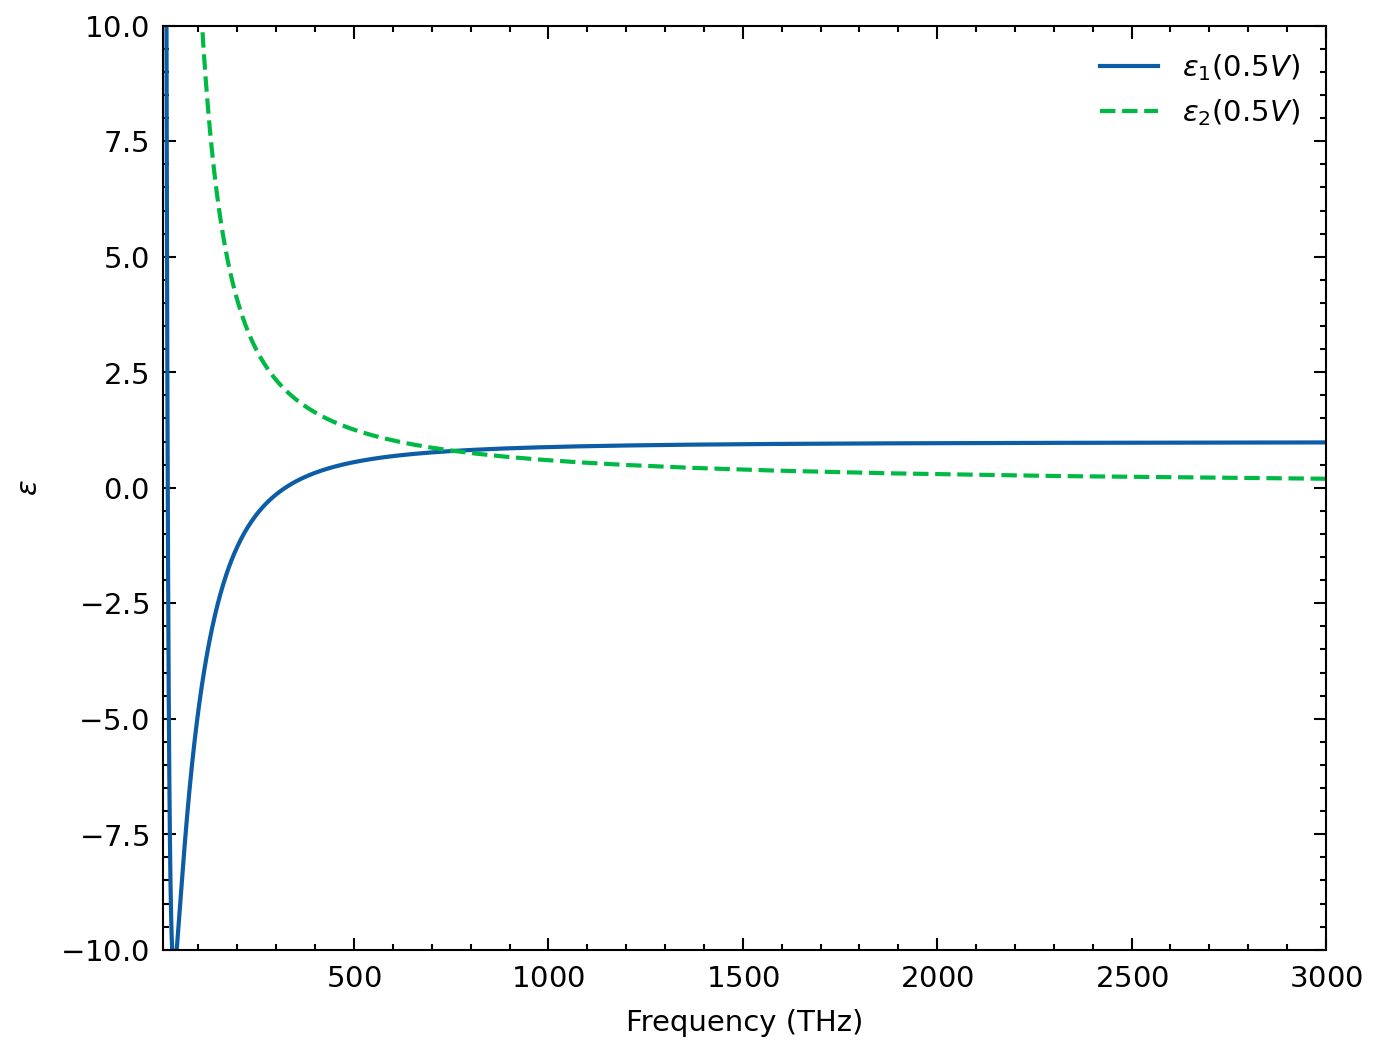

In [ ]:
c = 3e8
f = (c/(lbda_sample*1e-9))/1e12

fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
plt.plot(f, np.real(epsr5), label= '$\epsilon_1(0.5V)$')
plt.plot(f, np.imag(epsr5), '--', label= '$\epsilon_2(0.5V)$')
plt.xlabel('Frequency (THz)')
plt.ylabel('$\epsilon$')
plt.xlim([np.min(f), np.max(f)])
plt.ylim([-10, 10])
plt.legend()

([], [])

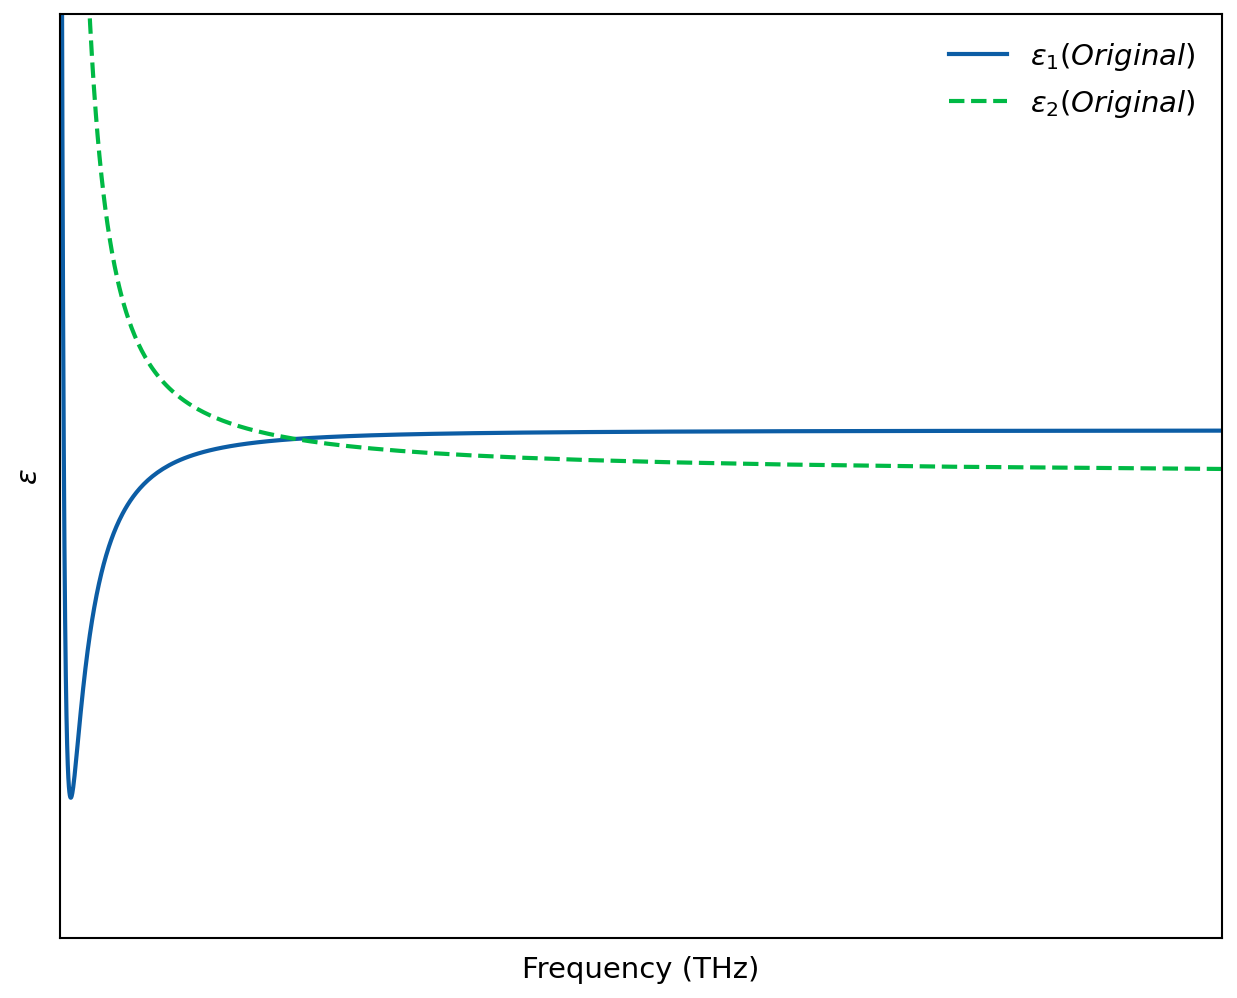

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
plt.plot(f, np.real(epsro), label= '$\epsilon_1(Original)$')
plt.plot(f, np.imag(epsro), '--', label= '$\epsilon_2(Original)$')
plt.xlabel('Frequency (THz)')
plt.ylabel('$\epsilon$')
plt.xlim([np.min(f), np.max(f)])
plt.ylim([-10, 10])
plt.legend()

plt.xticks([])
plt.yticks([])

In [ ]:
fig.savefig("ellip_result.svg", transparent=True)

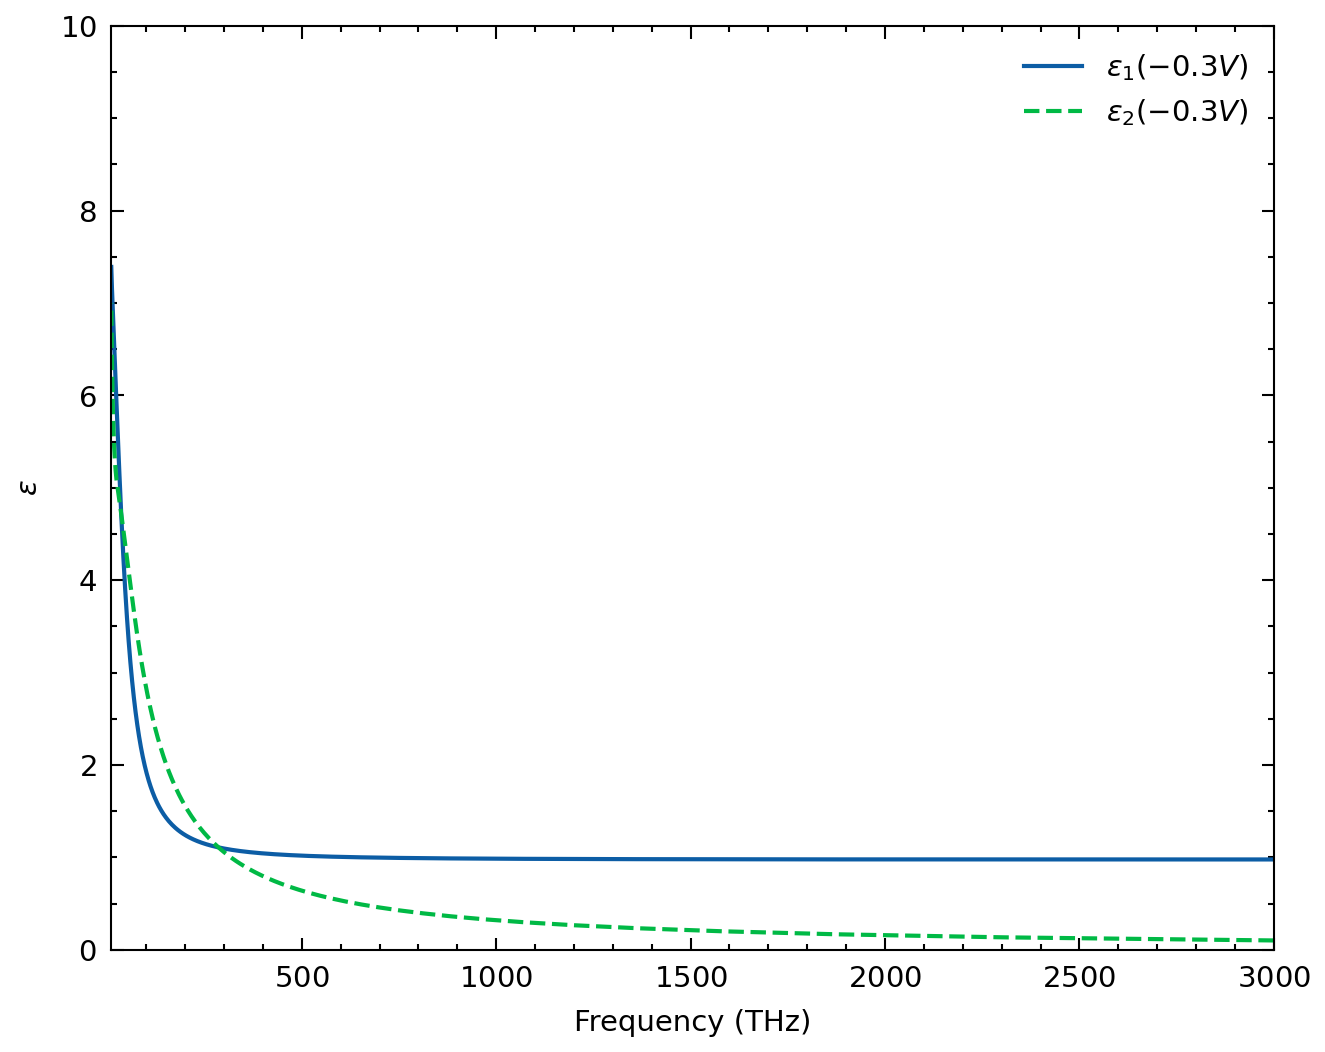

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
plt.plot(f, np.real(epsr3), label= '$\epsilon_1(-0.3V)$')
plt.plot(f, np.imag(epsr3), '--', label= '$\epsilon_2(-0.3V)$')
plt.xlabel('Frequency (THz)')
plt.ylabel('$\epsilon$')
plt.xlim([np.min(f), np.max(f)])
plt.ylim([0, 10])
plt.legend()

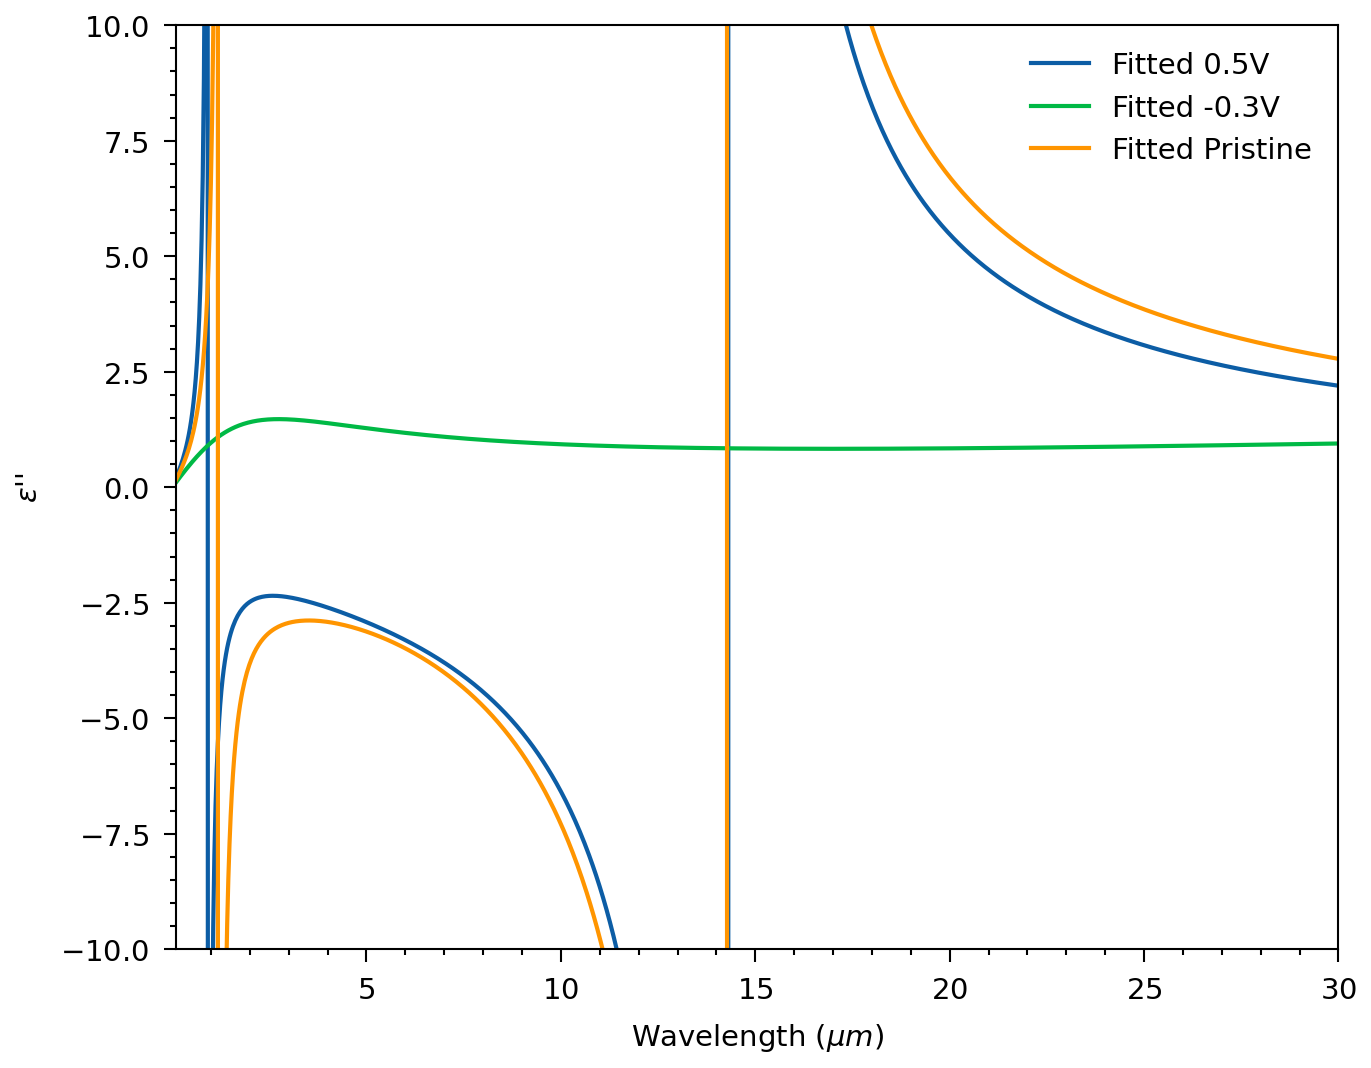

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
plt.plot(lbda_sample/1000, np.imag(epsr5)/np.real(epsr5), label='Fitted 0.5V')
plt.plot(lbda_sample/1000, np.imag(epsr3)/np.real(epsr3), label='Fitted -0.3V')
plt.plot(lbda_sample/1000, np.imag(epsro)/np.real(epsro), label='Fitted Pristine')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('$\epsilon$\'\'')
plt.xlim([np.min(lbda_sample/1000), np.max(lbda_sample/1000)])
plt.ylim([-10, 10])
plt.legend()

# Remove top and right spines and ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make ticks point outwards
ax.tick_params(direction='out', which='both', right=False, top=False)

plt.show()